In [1]:
# Necessary imports
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import inflect


In [2]:
train_df = pd.read_csv('train_values.csv')
test_df = pd.read_csv('test_values.csv')

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [4]:
(((train_df.shape[0] - train_df.count(axis=0))/train_df.shape[0])*100).sort_values(ascending=False)

previous_year_rating    7.524449
education               4.395344
is_promoted             0.000000
avg_training_score      0.000000
awards_won?             0.000000
KPIs_met >80%           0.000000
length_of_service       0.000000
age                     0.000000
no_of_trainings         0.000000
recruitment_channel     0.000000
gender                  0.000000
region                  0.000000
department              0.000000
employee_id             0.000000
dtype: float64

#### Note:
1. If 15% - 20% of the values are present we usually drop those columns.
2. previous_year_rating and education have 7.52% and 4.39% missing values. So we will impute those values.

In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
employee_id             23490 non-null int64
department              23490 non-null object
region                  23490 non-null object
education               22456 non-null object
gender                  23490 non-null object
recruitment_channel     23490 non-null object
no_of_trainings         23490 non-null int64
age                     23490 non-null int64
previous_year_rating    21678 non-null float64
length_of_service       23490 non-null int64
KPIs_met >80%           23490 non-null int64
awards_won?             23490 non-null int64
avg_training_score      23490 non-null int64
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [6]:
(((test_df.shape[0] - test_df.count(axis=0))/test_df.shape[0])*100).sort_values(ascending=False)

previous_year_rating    7.713921
education               4.401873
avg_training_score      0.000000
awards_won?             0.000000
KPIs_met >80%           0.000000
length_of_service       0.000000
age                     0.000000
no_of_trainings         0.000000
recruitment_channel     0.000000
gender                  0.000000
region                  0.000000
department              0.000000
employee_id             0.000000
dtype: float64

#### Note:
1. If 15% - 20% of the values are present we usually drop those columns.
2. previous_year_rating and education have 7.71% and 4.40% missing values. So we will impute those values using the train data values

In [7]:
train_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [8]:
train_df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [9]:
train_df1 = train_df.copy(deep=True)

In [10]:
train_df.department.value_counts()

Sales & Marketing    16840
Operations           11348
Procurement           7138
Technology            7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [11]:
train_df.department.value_counts().sum()

54808

In [12]:
train_df.department.nunique()

9

In [13]:
train_df.region.value_counts()

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64

In [14]:
train_df.region.value_counts().sum()

54808

In [15]:
train_df.region.nunique()

34

In [16]:
train_df.education.value_counts(dropna=False)

Bachelor's          36669
Master's & above    14925
NaN                  2409
Below Secondary       805
Name: education, dtype: int64

In [17]:
train_df.education.value_counts().sum()

52399

In [18]:
train_df.gender.value_counts()

m    38496
f    16312
Name: gender, dtype: int64

In [19]:
train_df.gender.value_counts().sum()

54808

In [20]:
train_df.recruitment_channel.value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

In [21]:
train_df.recruitment_channel.value_counts().sum()

54808

In [22]:
train_df.no_of_trainings.value_counts()

1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
10        5
9         5
8         5
Name: no_of_trainings, dtype: int64

In [23]:
train_df.no_of_trainings.value_counts().sum()

54808

In [24]:
train_df.age.value_counts()

30    3665
31    3534
32    3534
29    3405
33    3210
28    3147
34    3076
27    2827
35    2711
36    2517
37    2165
26    2060
38    1923
39    1695
40    1663
25    1299
41    1289
42    1149
43     992
44     847
24     845
45     760
46     697
47     557
48     557
50     521
49     441
23     428
51     389
53     364
52     351
54     313
55     294
56     264
57     238
22     231
60     217
58     213
59     209
20     113
21      98
Name: age, dtype: int64

In [25]:
train_df.age.value_counts().sum()

54808

In [26]:
train_df.age.nunique()

41

In [27]:
train_df.previous_year_rating.value_counts(dropna=False)

 3.0    18618
 5.0    11741
 4.0     9877
 1.0     6223
 2.0     4225
NaN      4124
Name: previous_year_rating, dtype: int64

In [28]:
train_df.previous_year_rating.value_counts().sum()

50684

In [29]:
train_df.length_of_service.value_counts()

3     7033
4     6836
2     6684
5     5832
7     5551
6     4734
1     4547
8     2883
9     2629
10    2193
11     916
12     794
13     687
15     593
14     549
16     548
17     432
18     392
19     329
20     128
21      78
24      70
23      65
22      61
25      51
26      41
27      36
28      30
29      30
31      20
30      12
32      10
33       9
34       4
37       1
Name: length_of_service, dtype: int64

In [30]:
train_df.length_of_service.nunique()

35

In [31]:
train_df['KPIs_met >80%'].value_counts()

0    35517
1    19291
Name: KPIs_met >80%, dtype: int64

In [32]:
train_df['KPIs_met >80%'].value_counts().sum()

54808

In [33]:
train_df['awards_won?'].value_counts()

0    53538
1     1270
Name: awards_won?, dtype: int64

In [34]:
train_df['awards_won?'].value_counts().sum()

54808

In [35]:
train_df.avg_training_score.value_counts()

50    2716
49    2681
48    2437
51    2347
60    2155
59    2064
58    1898
61    1879
52    1856
47    1746
62    1450
82    1447
57    1437
81    1357
53    1324
80    1206
83    1198
84    1168
79    1160
46    1136
85    1072
56    1070
70    1055
63    1021
69    1018
54     997
68     935
78     933
86     912
71     898
      ... 
67     728
72     725
64     708
77     697
45     681
87     655
65     599
66     580
73     523
76     516
88     444
74     433
75     403
44     335
89     301
90     185
43     176
91     117
92      99
93      84
94      65
42      62
97      49
96      48
95      45
98      37
99      35
41      26
40       5
39       2
Name: avg_training_score, Length: 61, dtype: int64

In [36]:
train_df.avg_training_score.value_counts().sum()

54808

In [37]:
train_df.avg_training_score.nunique()

61

In [38]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
employee_id             23490 non-null int64
department              23490 non-null object
region                  23490 non-null object
education               22456 non-null object
gender                  23490 non-null object
recruitment_channel     23490 non-null object
no_of_trainings         23490 non-null int64
age                     23490 non-null int64
previous_year_rating    21678 non-null float64
length_of_service       23490 non-null int64
KPIs_met >80%           23490 non-null int64
awards_won?             23490 non-null int64
avg_training_score      23490 non-null int64
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [39]:
test_df.education.value_counts(dropna=False)

Bachelor's          15578
Master's & above     6504
NaN                  1034
Below Secondary       374
Name: education, dtype: int64

In [40]:
test_df.previous_year_rating.value_counts(dropna=False)

 3.0    7921
 5.0    5097
 4.0    4249
 1.0    2680
NaN     1812
 2.0    1731
Name: previous_year_rating, dtype: int64

# EDA

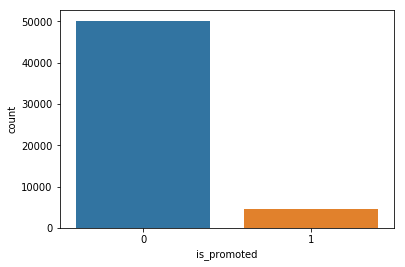

In [41]:
sns.countplot(train_df.is_promoted)

## Department 

In [42]:
train_df.department.value_counts()

Sales & Marketing    16840
Operations           11348
Procurement           7138
Technology            7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [43]:
crosstab = pd.crosstab(index=train_df.department, columns=train_df.is_promoted)
crosstab


is_promoted,0,1
department,,
Analytics,4840,512
Finance,2330,206
HR,2282,136
Legal,986,53
Operations,10325,1023
Procurement,6450,688
R&D,930,69
Sales & Marketing,15627,1213
Technology,6370,768


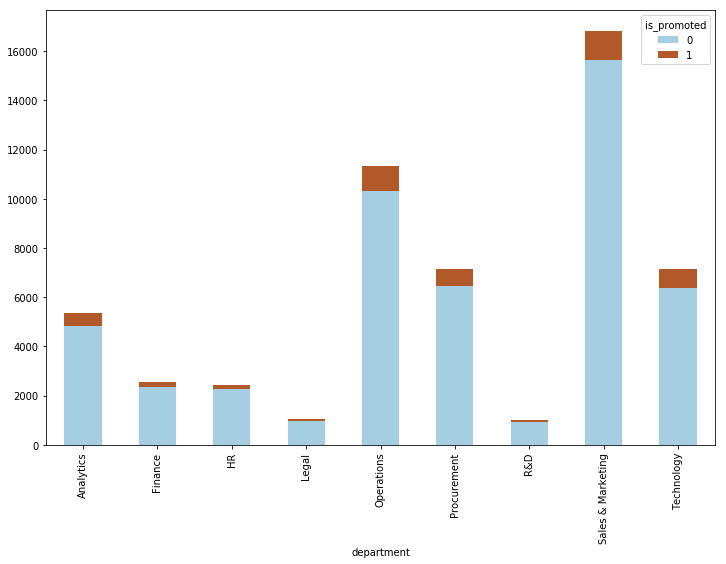

In [44]:
crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

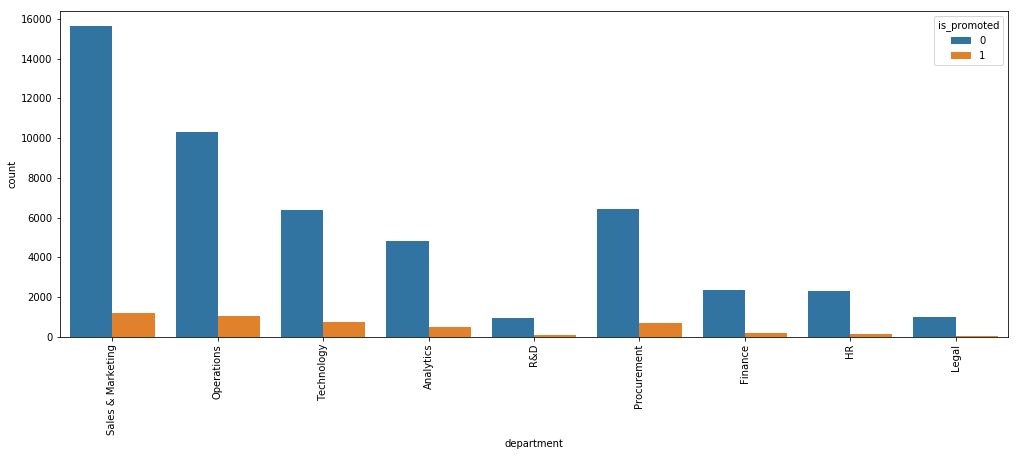

In [45]:
plt.figure(figsize=(17,6))
sns.countplot(train_df.department,hue=train_df.is_promoted)
plt.xticks(rotation=90)

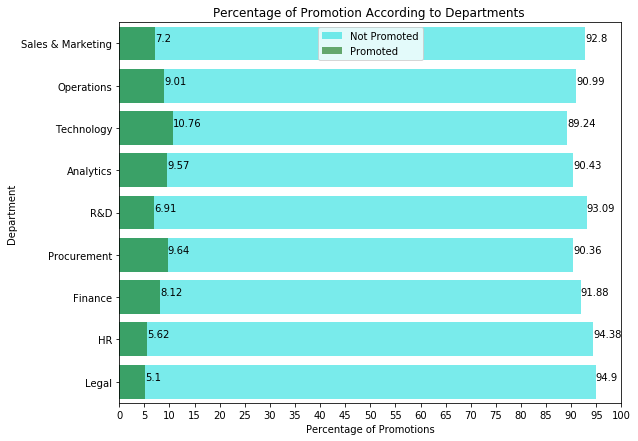

In [46]:
# "Percentage of Promotion According to Departments "
department_list = list(train_df['department'].unique())

not_promoted = []
promoted=[]
for i in department_list:
    x = train_df[train_df['department']==i]
    not_promoted.append((sum(x.is_promoted == 0)/len(x))*100)
    promoted.append((sum(x.is_promoted == 1)/len(x))*100)

# visualization
f,ax = plt.subplots(figsize = (9,7))
total = float(len(train_df))
b1 = sns.barplot(x=not_promoted,y=department_list,color='cyan',alpha = 0.6,label='Not Promoted') 
b2 = sns.barplot(x=promoted,y=department_list,color='green',alpha = 0.6,label='Promoted')
for p in b1.patches:
    ax.annotate(str(float("{0:.2f}".format(p.get_width()))), (p.get_x() + p.get_width(), p.get_y()), xytext=(0, -15), textcoords='offset points',color='black')

ax.legend(loc='upper center',frameon = True)     # legend
ax.set(xlabel='Percentage of Promotions', ylabel='Department',title = "Percentage of Promotion According to Departments ")

plt.xticks(np.arange(0,105,5))
#plt.grid(color='gray', linestyle='-', linewidth=0.5,axis='x')
plt.show()

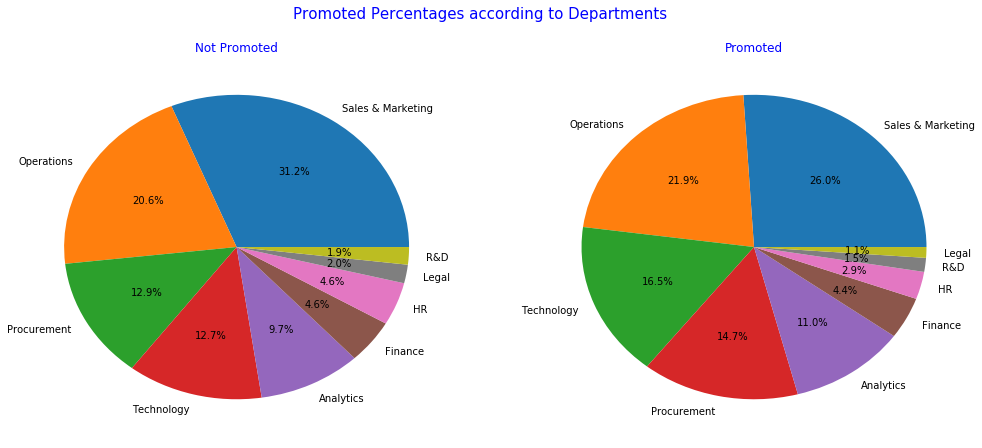

In [47]:
# Not Promoted/Promoted Percentages according to Departments
#train_df[train_df['is_promoted']==0]['department'].dropna(inplace = True)
not_prom_nos = train_df[train_df['is_promoted']==0]['department'].value_counts().nunique()
not_prom_labels = train_df[train_df['is_promoted']==0]['department'].value_counts().index
not_prom_explode = list(np.zeros(not_prom_nos).astype(int))
not_prom_per = train_df[train_df['is_promoted']==0]['department'].value_counts().values

prom_nos = train_df[train_df['is_promoted']==1]['department'].value_counts().nunique()
prom_labels = train_df[train_df['is_promoted']==1]['department'].value_counts().index
prom_explode = list(np.zeros(prom_nos).astype(int))
prom_per = train_df[train_df['is_promoted']==1]['department'].value_counts().values

# visual
plt.figure(figsize = (17,7))
plt.subplot(1,2,1)
plt.pie(not_prom_per,labels=not_prom_labels,explode=not_prom_explode, autopct='%1.1f%%')
plt.title('Not Promoted',color = 'blue',fontsize = 12)

plt.subplot(1,2,2)
plt.pie(prom_per,labels=prom_labels,explode=prom_explode, autopct='%1.1f%%')
plt.title('Promoted',color = 'blue',fontsize = 12)
plt.suptitle('Promoted Percentages according to Departments',color = 'blue',fontsize = 15)
plt.show()

#### Note:
1. The top 5 departments which are promoted are Sales & Marketing, Operations,Technology, Procurement & Analytics. But this follows the trend of the total number of people employed in these departments.
2. Within a department the percentage of promotions range from 5%-10% with technology, analytics & procurement leading the pack.

## region

In [48]:
train_df.region.value_counts()

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64

In [49]:
crosstab = pd.crosstab(index=train_df.region, columns=train_df.is_promoted)
crosstab

is_promoted,0,1
region,,
region_1,552,58
region_10,597,51
region_11,1241,74
region_12,467,33
region_13,2418,230
region_14,765,62
region_15,2586,222
region_16,1363,102
region_17,687,109


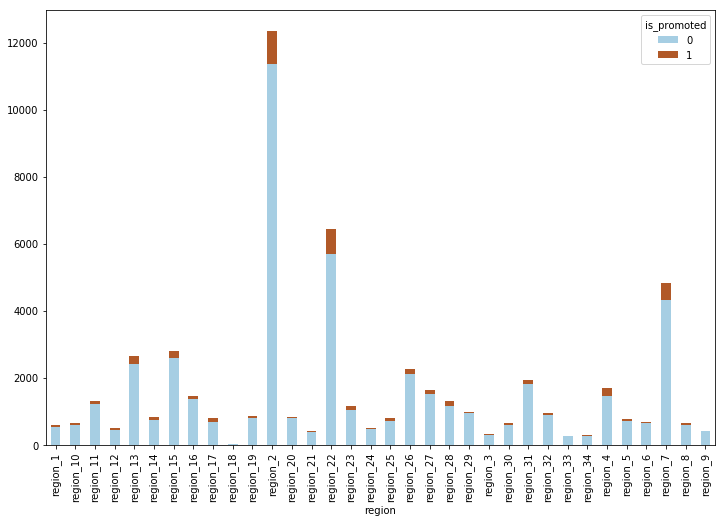

In [50]:
crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text xticklabel objects>)

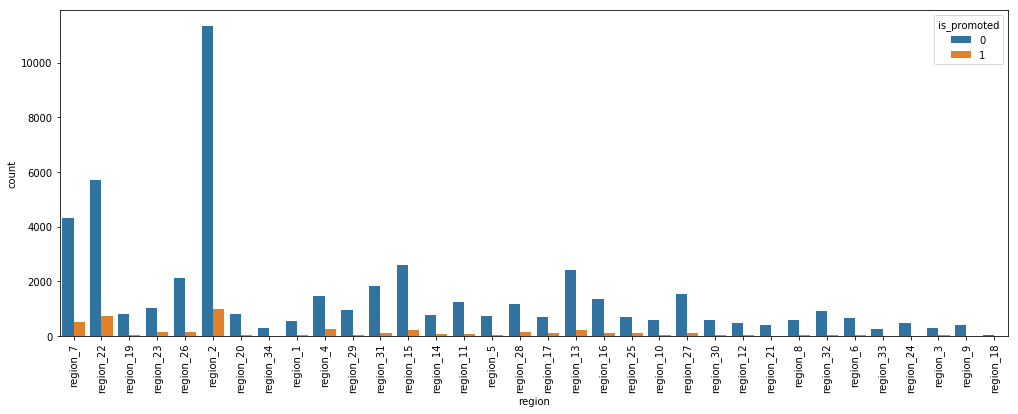

In [51]:
plt.figure(figsize=(17,6))
sns.countplot(train_df.region,hue=train_df.is_promoted)
plt.xticks(rotation=90)

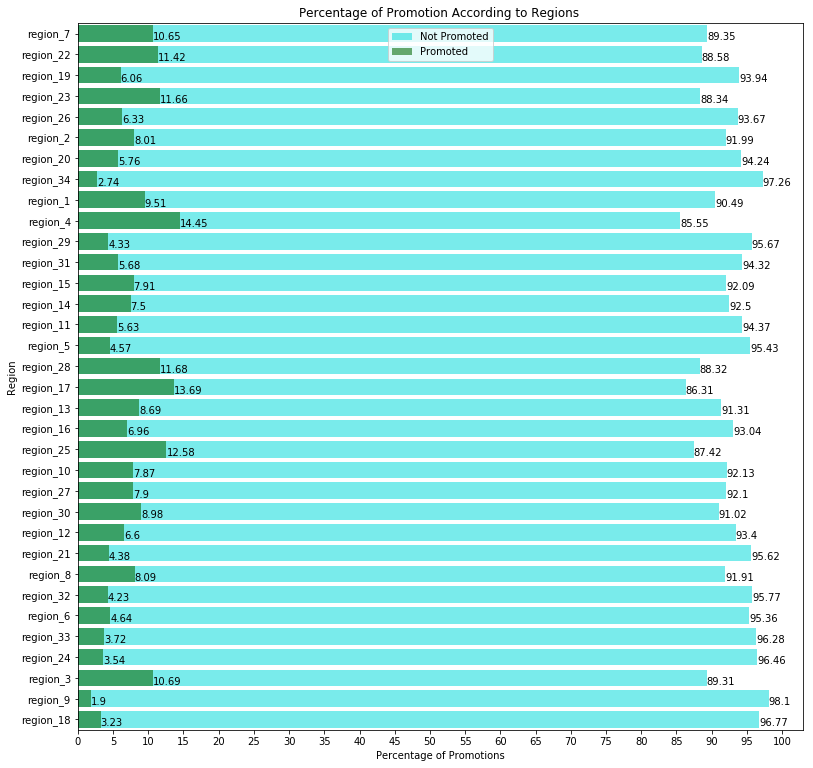

In [52]:
# "Percentage of Promotion According to Regions "
req_list = list(train_df['region'].unique())

not_promoted = []
promoted=[]
for i in req_list:
    x = train_df[train_df['region']==i]
    not_promoted.append((sum(x.is_promoted == 0)/len(x))*100)
    promoted.append((sum(x.is_promoted == 1)/len(x))*100)

# visualization
f,ax = plt.subplots(figsize = (13,13))
total = float(len(train_df))
b1 = sns.barplot(x=not_promoted,y=req_list,color='cyan',alpha = 0.6,label='Not Promoted') 
b2 = sns.barplot(x=promoted,y=req_list,color='green',alpha = 0.6,label='Promoted')
for p in b1.patches:
    ax.annotate(str(float("{0:.2f}".format(p.get_width()))), (p.get_x() + p.get_width(), p.get_y()), xytext=(0, -15), textcoords='offset points',color='black')

ax.legend(loc='upper center',frameon = True)     # legend
ax.set(xlabel='Percentage of Promotions', ylabel='Region',title = "Percentage of Promotion According to Regions ")

plt.xticks(np.arange(0,105,5))
#plt.grid(color='gray', linestyle='-', linewidth=0.5,axis='x')
plt.show()

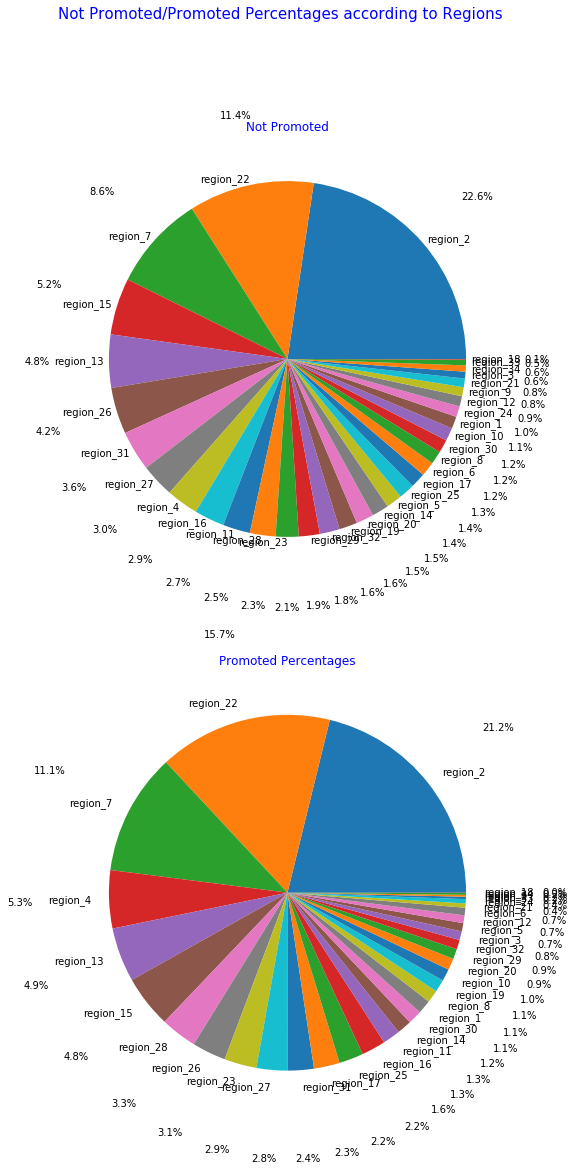

In [53]:
# Not Promoted/Promoted Percentages according to Regions
#train_df[train_df['is_promoted']==0]['department'].dropna(inplace = True)
df = train_df[train_df['is_promoted']==0]['region']
not_prom_nos = df.value_counts().nunique()
not_prom_labels = df.value_counts().index
not_prom_explode = list(np.zeros(not_prom_nos).astype(int))
not_prom_per = df.value_counts().values

df1 = train_df[train_df['is_promoted']==1]['region']
prom_nos = df1.value_counts().nunique()
prom_labels = df1.value_counts().index
prom_explode = list(np.zeros(prom_nos).astype(int))
prom_per = df1.value_counts().values

# visual
plt.figure(figsize = (8,18))
plt.subplot(2,1,1)
plt.pie(not_prom_per,labels=not_prom_labels,explode=not_prom_explode, autopct='%1.1f%%',pctdistance=1.4,labeldistance=1.03
       )
#plt.legend(loc='center')
plt.title('Not Promoted',color = 'blue',fontsize = 12)

plt.subplot(2,1,2)
plt.pie(prom_per,labels=prom_labels, autopct='%1.1f%%',pctdistance=1.5)
plt.title('Promoted Percentages',color = 'blue',fontsize = 12)

plt.suptitle('Not Promoted/Promoted Percentages according to Regions',color = 'blue',fontsize = 15)
plt.show()

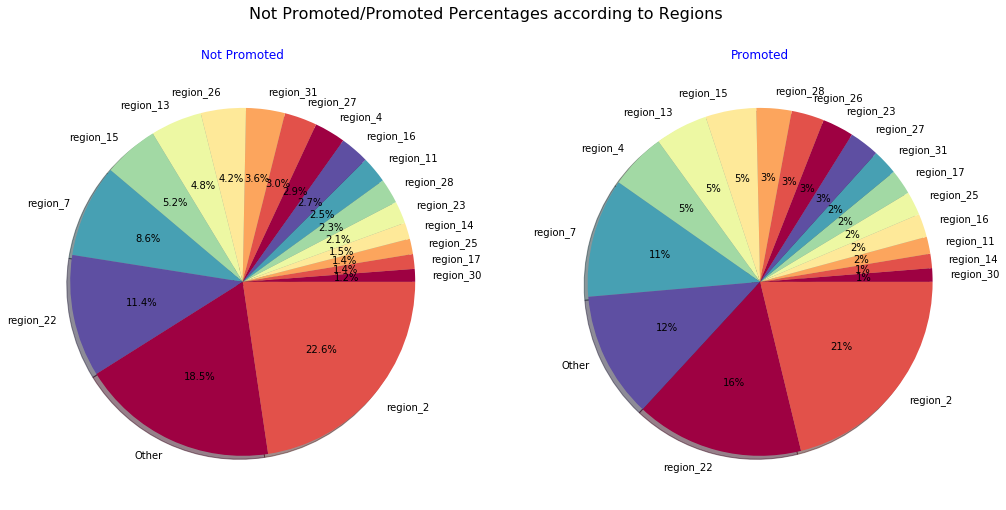

In [54]:
## Grouping the low percentages

def group_lower_ranking_values(df,column):
    pie_counts = df1.groupby(column).agg('count')
    pct_value = pie_counts[lambda df: df.columns[0]].quantile(.50)
    values_below_pct_value = pie_counts[lambda df: df.columns[0]].loc[lambda s: s < pct_value].index.values
    def fix_values(row):
        if row[column] in values_below_pct_value:
            row[column] = 'Other'
        return row 
    pie_grouped = df.apply(fix_values, axis=1).groupby(column).agg('count')
    return pie_grouped


df = train_df[train_df['is_promoted']==0]
df1 = train_df[train_df['is_promoted']==1]
not_promoted = group_lower_ranking_values(df,'region')
promoted = group_lower_ranking_values(df1,'region')

not_promoted_labels = not_promoted['is_promoted'].sort_values().index
not_promoted_counts = not_promoted['is_promoted'].sort_values()

promoted_labels = promoted['is_promoted'].sort_values().index
promoted_counts = promoted['is_promoted'].sort_values()

# Visualization
plt.figure(1, figsize=(17,8))

cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

plt.subplot(1,2,1)
not_promoted_pie = plt.pie(not_promoted_counts, labels=not_promoted_labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.title('Not Promoted',color = 'blue',fontsize = 12)

plt.subplot(1,2,2)
promoted_pie = plt.pie(promoted_counts,labels=promoted_labels, autopct='%.0f%%', shadow=True, colors=colors)
plt.title('Promoted',color = 'blue',fontsize = 12)

plt.suptitle('Not Promoted/Promoted Percentages according to Regions', fontsize=16)
plt.show()

#### Note:
1. The top 5 regions which are promoted are region2, region22 & region7. But this follows the trend of the total number of people employed in these regions.
2. Within a department the percentage of promotions range from 2%-15% with region4, region17 & region25 leading the pack.

## education

In [55]:
train_df.education.value_counts(dropna=False)

Bachelor's          36669
Master's & above    14925
NaN                  2409
Below Secondary       805
Name: education, dtype: int64

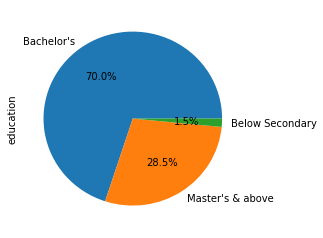

In [56]:
plt.figure(figsize=(4,4))
train_df.education.value_counts().plot('pie',autopct='%1.1f%%')
plt.show()

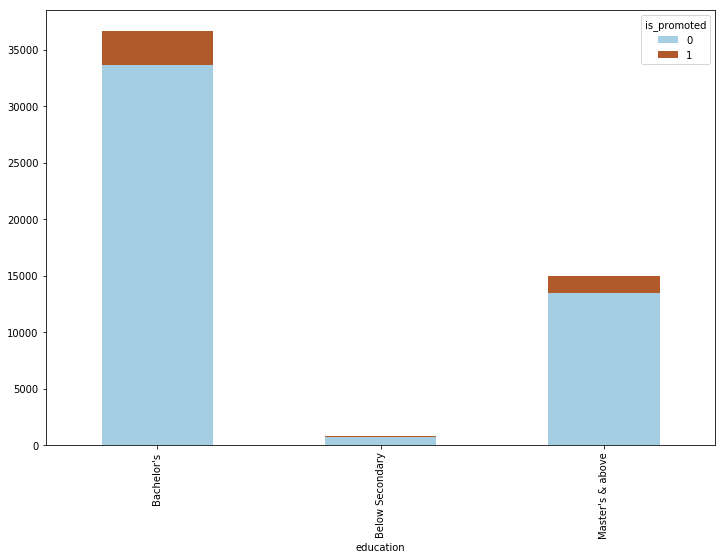

In [57]:
crosstab = pd.crosstab(index=train_df.education, columns=train_df.is_promoted,dropna=False)
crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

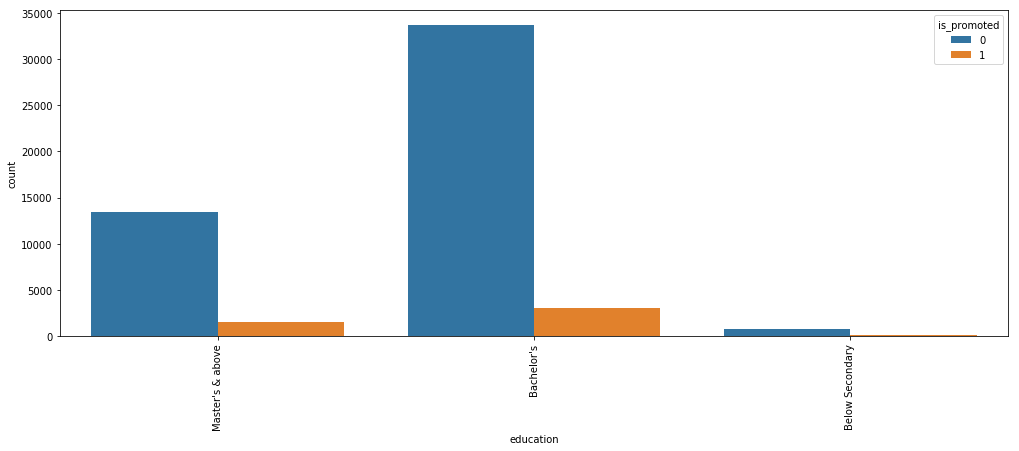

In [58]:
plt.figure(figsize=(17,6))
sns.countplot(train_df.education,hue=train_df.is_promoted)
plt.xticks(rotation=90)

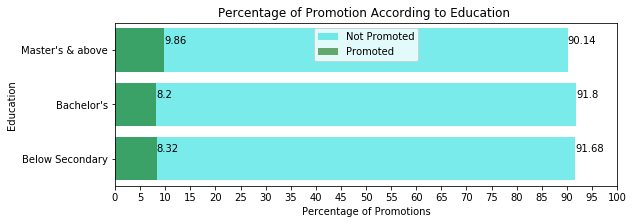

In [59]:
# "Percentage of Promotion According to Education "
req_list = list(train_df['education'].unique())
req_list = [x for x in req_list if str(x) != 'nan']
not_promoted = []
promoted=[]
for i in req_list:
    x = train_df[train_df['education']==i]
    not_promoted.append((sum(x.is_promoted == 0)/len(x))*100)
    promoted.append((sum(x.is_promoted == 1)/len(x))*100)

# visualization
f,ax = plt.subplots(figsize = (9,3))
total = float(len(train_df))
b1 = sns.barplot(x=not_promoted,y=req_list,color='cyan',alpha = 0.6,label='Not Promoted') 
b2 = sns.barplot(x=promoted,y=req_list,color='green',alpha = 0.6,label='Promoted')
for p in b1.patches:
    ax.annotate(str(float("{0:.2f}".format(p.get_width()))), (p.get_x() + p.get_width(), p.get_y()), xytext=(0, -15), textcoords='offset points',color='black')

ax.legend(loc='upper center',frameon = True)     # legend
ax.set(xlabel='Percentage of Promotions', ylabel='Education',title = "Percentage of Promotion According to Education ")

plt.xticks(np.arange(0,105,5))
#plt.grid(color='gray', linestyle='-', linewidth=0.5,axis='x')
plt.show()

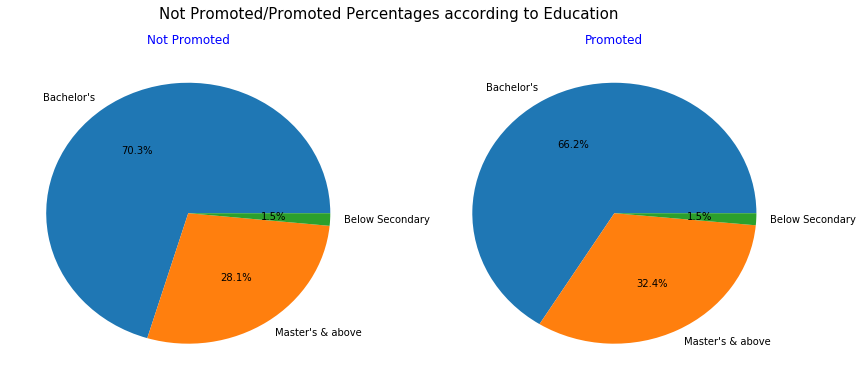

In [60]:
# Not Promoted/Promoted Percentages according to Regions
#train_df[train_df['is_promoted']==0]['department'].dropna(inplace = True)
df = train_df[train_df['is_promoted']==0]['education']
not_prom_nos = df.value_counts().nunique()
not_prom_labels = df.value_counts().index
not_prom_explode = list(np.zeros(not_prom_nos).astype(int))
not_prom_per = df.value_counts().values

df1 = train_df[train_df['is_promoted']==1]['education']
prom_nos = df1.value_counts().nunique()
prom_labels = df1.value_counts().index
prom_explode = list(np.zeros(prom_nos).astype(int))
prom_per = df1.value_counts().values

# visual
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
plt.pie(not_prom_per,labels=not_prom_labels,explode=not_prom_explode, autopct='%1.1f%%')
#plt.legend(loc='center')
plt.title('Not Promoted',color = 'blue',fontsize = 12)

plt.subplot(1,2,2)
plt.pie(prom_per,labels=prom_labels, autopct='%1.1f%%')
plt.title('Promoted',color = 'blue',fontsize = 12)

plt.suptitle('Not Promoted/Promoted Percentages according to Education',fontsize = 15)
plt.show()

#### Note:
1. The company has maximum employees having a bachelor's degree.
2. The promotions given among employees from different education backgrounds is almost similar around 8-9%.
3. Bachelors seem to be getting a huge chunk of the promotions but the proportion of promotions follows the same pattern as the number of employees employed by the company from different education backgrounds.
3. This needs to be further looked into as there are 2409 missing values

## Gender

In [61]:
train_df.gender.value_counts()

m    38496
f    16312
Name: gender, dtype: int64

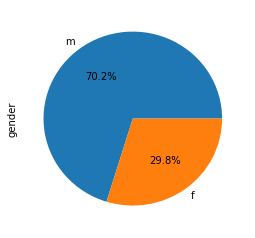

In [62]:
plt.figure(figsize=(4,4))
train_df["gender"].value_counts().plot('pie',autopct='%1.1f%%')
plt.show()

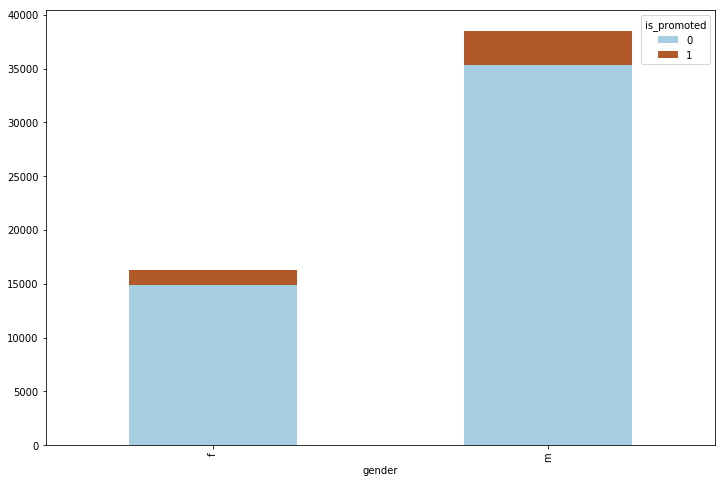

In [63]:
crosstab = pd.crosstab(index=train_df.gender, columns=train_df.is_promoted)
crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')


(array([0, 1]), <a list of 2 Text xticklabel objects>)

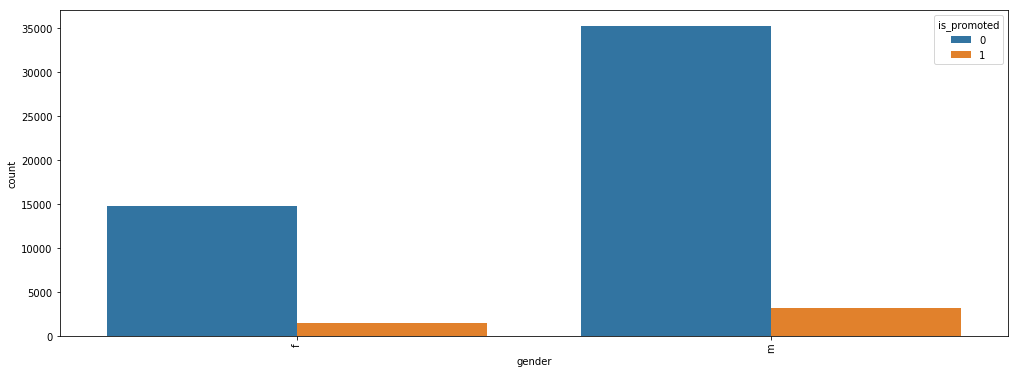

In [64]:
plt.figure(figsize=(17,6))
sns.countplot(train_df.gender,hue=train_df.is_promoted)
plt.xticks(rotation=90)

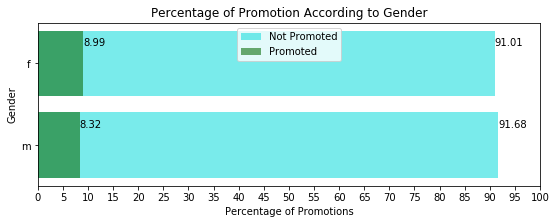

In [65]:
# "Percentage of Promotion According to Gender "
req_list = list(train_df['gender'].unique())
req_list = [x for x in req_list if str(x) != 'nan']
not_promoted = []
promoted=[]
for i in req_list:
    x = train_df[train_df['gender']==i]
    not_promoted.append((sum(x.is_promoted == 0)/len(x))*100)
    promoted.append((sum(x.is_promoted == 1)/len(x))*100)

# visualization
f,ax = plt.subplots(figsize = (9,3))
total = float(len(train_df))
b1 = sns.barplot(x=not_promoted,y=req_list,color='cyan',alpha = 0.6,label='Not Promoted') 
b2 = sns.barplot(x=promoted,y=req_list,color='green',alpha = 0.6,label='Promoted')
for p in b1.patches:
    ax.annotate(str(float("{0:.2f}".format(p.get_width()))), (p.get_x() + p.get_width(), p.get_y()), xytext=(0, -15), textcoords='offset points',color='black')

ax.legend(loc='upper center',frameon = True)     # legend
ax.set(xlabel='Percentage of Promotions', ylabel='Gender',title = "Percentage of Promotion According to Gender")

plt.xticks(np.arange(0,105,5))
#plt.grid(color='gray', linestyle='-', linewidth=0.5,axis='x')
plt.show()

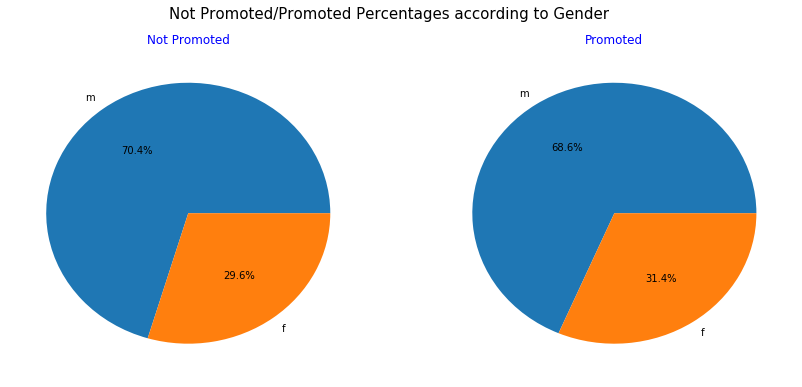

In [66]:
# Not Promoted/Promoted Percentages according to Gender
#train_df[train_df['is_promoted']==0]['department'].dropna(inplace = True)
df = train_df[train_df['is_promoted']==0]['gender']
not_prom_nos = df.value_counts().nunique()
not_prom_labels = df.value_counts().index
not_prom_explode = list(np.zeros(not_prom_nos).astype(int))
not_prom_per = df.value_counts().values

df1 = train_df[train_df['is_promoted']==1]['gender']
prom_nos = df1.value_counts().nunique()
prom_labels = df1.value_counts().index
prom_explode = list(np.zeros(prom_nos).astype(int))
prom_per = df1.value_counts().values

# visual
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
plt.pie(not_prom_per,labels=not_prom_labels,explode=not_prom_explode, autopct='%1.1f%%')
#plt.legend(loc='center')
plt.title('Not Promoted',color = 'blue',fontsize = 12)

plt.subplot(1,2,2)
plt.pie(prom_per,labels=prom_labels, autopct='%1.1f%%')
plt.title('Promoted',color = 'blue',fontsize = 12)

plt.suptitle('Not Promoted/Promoted Percentages according to Gender',fontsize = 15)
plt.show()

#### Note:
1. The company has almost 2/3rd male employees and 1/3rd female employees. Promotions are given in the same proportion.
2. The promotions given within a gender almost 8-9%.

## recruitment_channel

In [67]:
train_df.recruitment_channel.value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

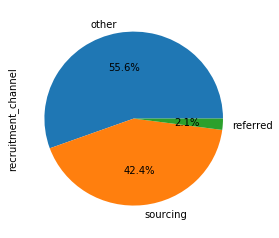

In [68]:
plt.figure(figsize=(4,4))
train_df['recruitment_channel'].value_counts().plot('pie',autopct='%1.1f%%')
plt.show()

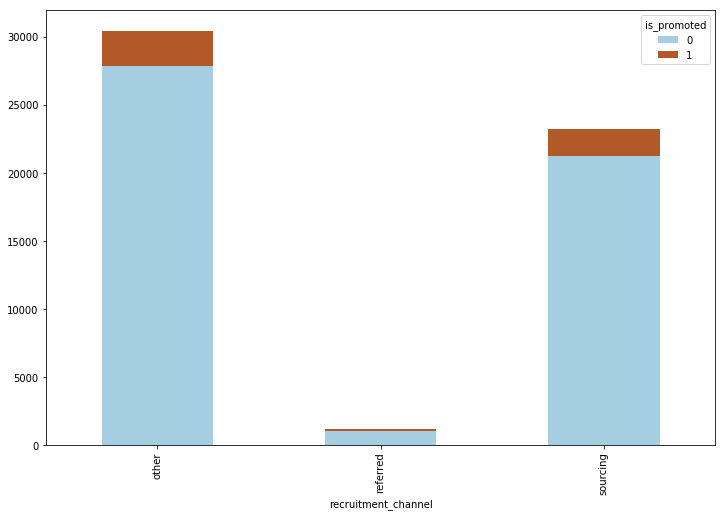

In [69]:
crosstab = pd.crosstab(index=train_df.recruitment_channel, columns=train_df.is_promoted)
crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

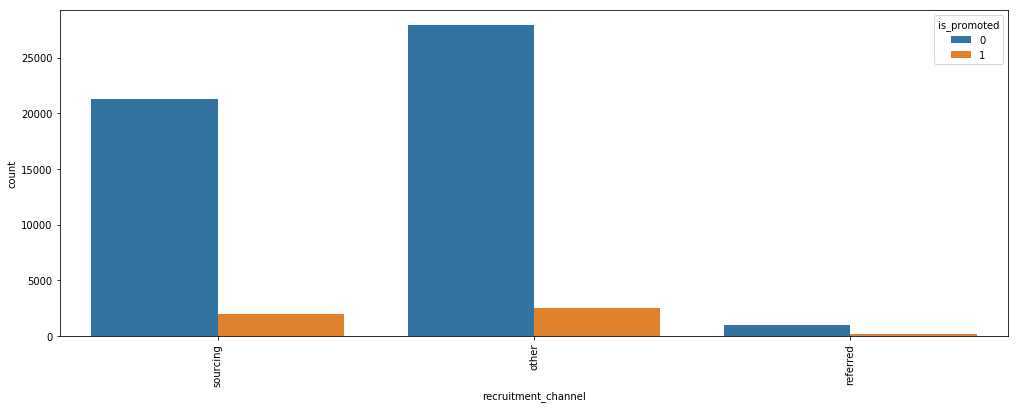

In [70]:
plt.figure(figsize=(17,6))
sns.countplot(train_df.recruitment_channel,hue=train_df.is_promoted)
plt.xticks(rotation=90)

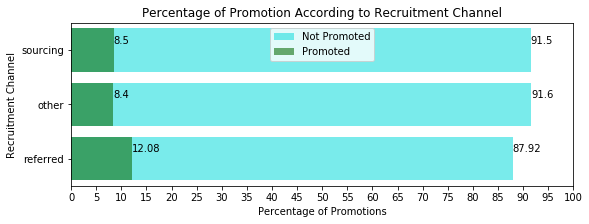

In [71]:
# "Percentage of Promotion According to Recruitment Channel "
req_list = list(train_df['recruitment_channel'].unique())
req_list = [x for x in req_list if str(x) != 'nan']
not_promoted = []
promoted=[]
for i in req_list:
    x = train_df[train_df['recruitment_channel']==i]
    not_promoted.append((sum(x.is_promoted == 0)/len(x))*100)
    promoted.append((sum(x.is_promoted == 1)/len(x))*100)

# visualization
f,ax = plt.subplots(figsize = (9,3))

b1 = sns.barplot(x=not_promoted,y=req_list,color='cyan',alpha = 0.6,label='Not Promoted') 
b2 = sns.barplot(x=promoted,y=req_list,color='green',alpha = 0.6,label='Promoted')

# For displaying the percentage values
for p in b1.patches:
    ax.annotate(str(float("{0:.2f}".format(p.get_width()))), (p.get_x() + p.get_width(), p.get_y()), xytext=(0, -15), textcoords='offset points',color='black')

ax.legend(loc='upper center',frameon = True)     # legend
ax.set(xlabel='Percentage of Promotions', ylabel='Recruitment Channel',title = "Percentage of Promotion According to Recruitment Channel")

plt.xticks(np.arange(0,105,5))
#plt.grid(color='gray', linestyle='-', linewidth=0.5,axis='x')
plt.show()

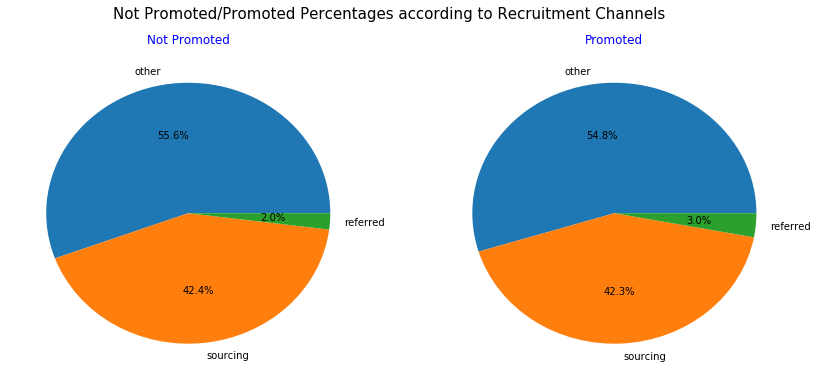

In [72]:
# Not Promoted/Promoted Percentages according to Recruitment Channels
#train_df[train_df['is_promoted']==0]['department'].dropna(inplace = True)
df = train_df[train_df['is_promoted']==0]['recruitment_channel']
not_prom_nos = df.value_counts().nunique()
not_prom_labels = df.value_counts().index
not_prom_explode = list(np.zeros(not_prom_nos).astype(int))
not_prom_per = df.value_counts().values

df1 = train_df[train_df['is_promoted']==1]['recruitment_channel']
prom_nos = df1.value_counts().nunique()
prom_labels = df1.value_counts().index
prom_explode = list(np.zeros(prom_nos).astype(int))
prom_per = df1.value_counts().values

# visual
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
plt.pie(not_prom_per,labels=not_prom_labels,explode=not_prom_explode, autopct='%1.1f%%')
#plt.legend(loc='center')
plt.title('Not Promoted',color = 'blue',fontsize = 12)

plt.subplot(1,2,2)
plt.pie(prom_per,labels=prom_labels, autopct='%1.1f%%')
plt.title('Promoted',color = 'blue',fontsize = 12)

plt.suptitle('Not Promoted/Promoted Percentages according to Recruitment Channels',fontsize = 15)
plt.show()

#### Note:
1. EMployees recruited from other recruitment channels were the highest followed by sourcing and referred.
2. The referred candidates form 2.1% but within the category, 12% received a promotion which is the highest among all the categories.
3. The promotions given within a category were between 8-12%.

## no_of_trainings

In [73]:
train_df['no_of_trainings'].value_counts()

1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
10        5
9         5
8         5
Name: no_of_trainings, dtype: int64

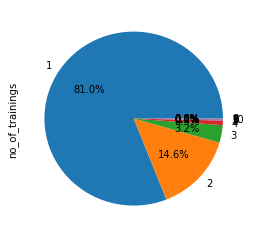

In [74]:
plt.figure(figsize=(4,4))
train_df['no_of_trainings'].value_counts().plot('pie',autopct='%1.1f%%')
plt.show()

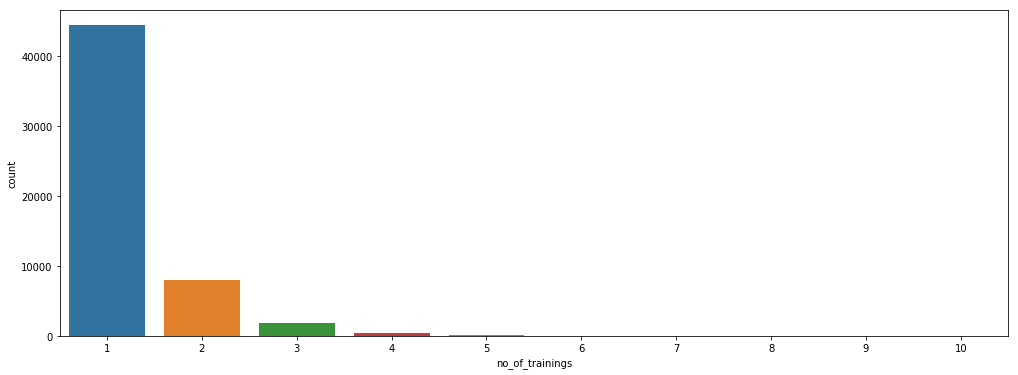

In [75]:
plt.figure(figsize=(17,6))
sns.countplot(train_df.no_of_trainings)

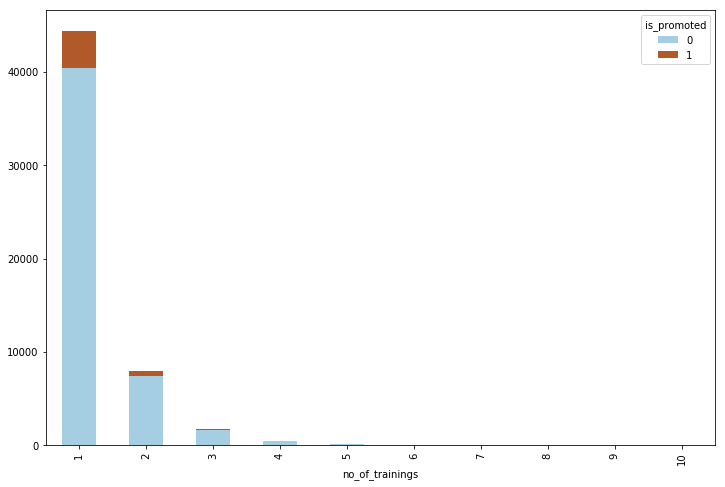

In [76]:
crosstab = pd.crosstab(index=train_df.no_of_trainings, columns=train_df.is_promoted)
crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

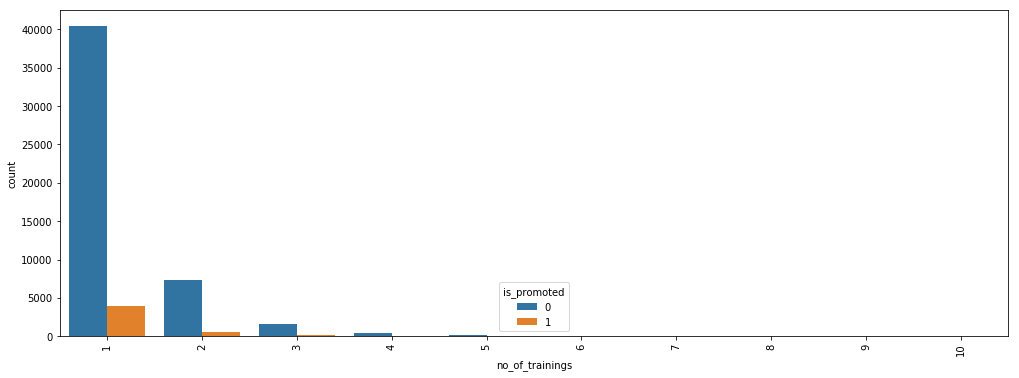

In [77]:
plt.figure(figsize=(17,6))
sns.countplot(train_df.no_of_trainings,hue=train_df.is_promoted)
plt.xticks(rotation=90)

In [78]:
sorted(list(train_df1['no_of_trainings'].unique()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

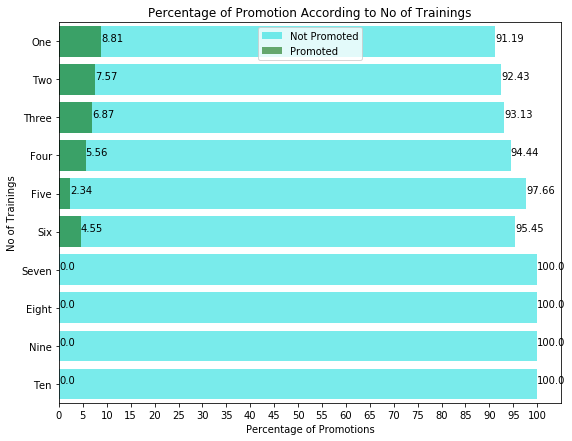

In [79]:
# "Percentage of Promotion According to No of Trainings "
train_df1['no_of_trainings'] = train_df1['no_of_trainings'].astype(object)
req_list = sorted(list(train_df1['no_of_trainings'].unique()))
req_list = [x for x in req_list if str(x) != 'nan']

not_promoted = []
promoted=[]
for i in req_list:
    x = train_df[train_df1['no_of_trainings']==i]
    not_promoted.append((sum(x.is_promoted == 0)/len(x))*100)
    promoted.append((sum(x.is_promoted == 1)/len(x))*100)

# visualization
f,ax = plt.subplots(figsize = (9,7))
req_list = ['One','Two','Three','Four','Five','Six','Seven','Eight','Nine','Ten']
b1 = sns.barplot(x=not_promoted,y=req_list,color='cyan',alpha = 0.6,label='Not Promoted') 
b2 = sns.barplot(x=promoted,y=req_list,color='green',alpha = 0.6,label='Promoted')

# For displaying the percentage values
for p in b1.patches:
    ax.annotate(str(float("{0:.2f}".format(p.get_width()))), (p.get_x() + p.get_width(), p.get_y()), xytext=(0, -15), textcoords='offset points',color='black')

ax.legend(loc='upper center',frameon = True)     # legend
ax.set(xlabel='Percentage of Promotions', ylabel='No of Trainings',title = "Percentage of Promotion According to No of Trainings")

plt.xticks(np.arange(0,105,5))
plt.show()

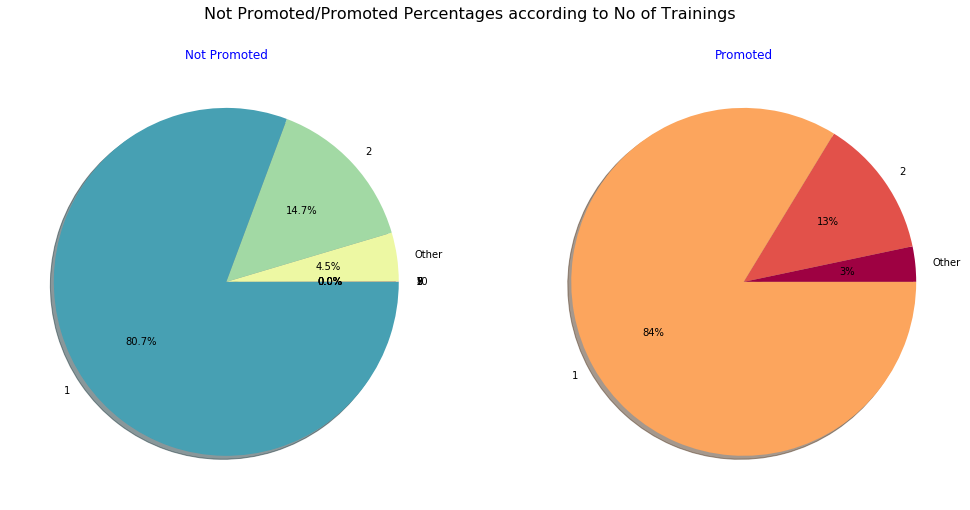

In [80]:
## Grouping the low percentages

def group_lower_ranking_values(df,column):
    pie_counts = df1.groupby(column).agg('count')
    pct_value = pie_counts[lambda df: df.columns[0]].quantile(.80)
    values_below_pct_value = pie_counts[lambda df: df.columns[0]].loc[lambda s: s < pct_value].index.values
    def fix_values(row):
        if row[column] in values_below_pct_value:
            row[column] = 'Other'
        return row 
    pie_grouped = df.apply(fix_values, axis=1).groupby(column).agg('count')
    return pie_grouped


df = train_df[train_df['is_promoted']==0]
df1 = train_df[train_df['is_promoted']==1]
not_promoted = group_lower_ranking_values(df,'no_of_trainings')
promoted = group_lower_ranking_values(df1,'no_of_trainings')

not_promoted_labels = not_promoted['is_promoted'].sort_values().index
not_promoted_counts = not_promoted['is_promoted'].sort_values()

promoted_labels = promoted['is_promoted'].sort_values().index
promoted_counts = promoted['is_promoted'].sort_values()

# Visualization
plt.figure(1, figsize=(17,8))

cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

plt.subplot(1,2,1)
not_promoted_pie = plt.pie(not_promoted_counts, labels=not_promoted_labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.title('Not Promoted',color = 'blue',fontsize = 12)

plt.subplot(1,2,2)
promoted_pie = plt.pie(promoted_counts,labels=promoted_labels, autopct='%.0f%%', shadow=True, colors=colors)
plt.title('Promoted',color = 'blue',fontsize = 12)

plt.suptitle('Not Promoted/Promoted Percentages according to No of Trainings', fontsize=16)
plt.show()

#### Note
1. The number of employees given a number of trainings reduces from 1 to 10.
2. The percentage of promotions given varies inversely with the number of trainings provided.

## previous_year_rating

In [81]:
train_df['previous_year_rating'].value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

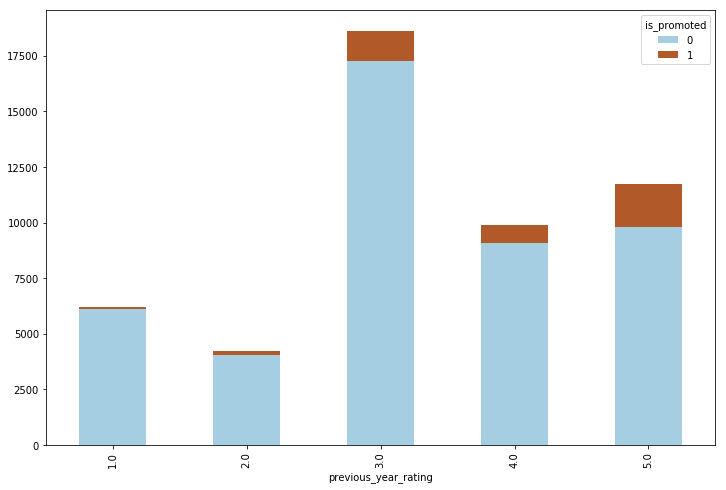

In [82]:
crosstab = pd.crosstab(index=train_df.previous_year_rating, columns=train_df.is_promoted)
crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

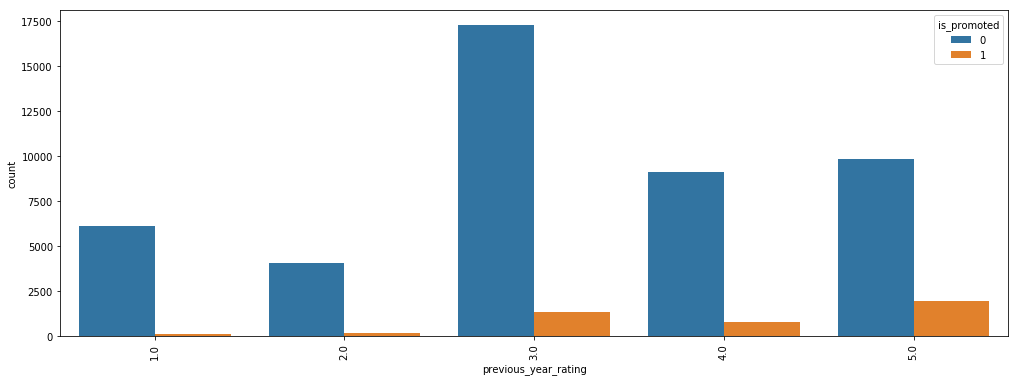

In [83]:
plt.figure(figsize=(17,6))
sns.countplot(train_df.previous_year_rating,hue=train_df.is_promoted)
plt.xticks(rotation=90)

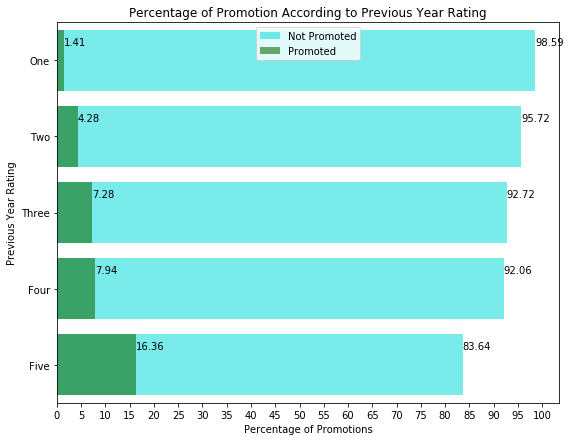

In [84]:
# "Percentage of Promotion According to Previous Year Rating "
train_df1['previous_year_rating'] = train_df1['previous_year_rating'].astype(object)
req_list = sorted(list(train_df1['previous_year_rating'].unique()))
req_list = [x for x in req_list if str(x) != 'nan']

not_promoted = []
promoted=[]
for i in req_list:
    x = train_df[train_df1['previous_year_rating']==i]
    not_promoted.append((sum(x.is_promoted == 0)/len(x))*100)
    promoted.append((sum(x.is_promoted == 1)/len(x))*100)

# visualization
f,ax = plt.subplots(figsize = (9,7))
req_list = ['One','Two','Three','Four','Five']
b1 = sns.barplot(x=not_promoted,y=req_list,color='cyan',alpha = 0.6,label='Not Promoted') 
b2 = sns.barplot(x=promoted,y=req_list,color='green',alpha = 0.6,label='Promoted')

# For displaying the percentage values
for p in b1.patches:
    ax.annotate(str(float("{0:.2f}".format(p.get_width()))), (p.get_x() + p.get_width(), p.get_y()), xytext=(0, -15), textcoords='offset points',color='black')

ax.legend(loc='upper center',frameon = True)     # legend
ax.set(xlabel='Percentage of Promotions', ylabel='Previous Year Rating',title = "Percentage of Promotion According to Previous Year Rating")

plt.xticks(np.arange(0,105,5))
plt.show()

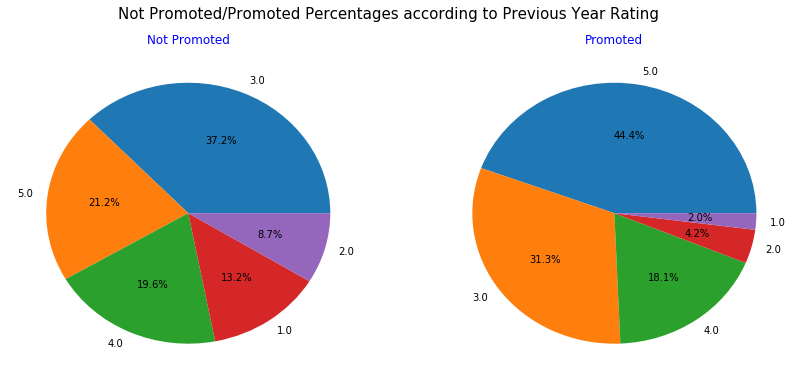

In [85]:
# Not Promoted/Promoted Percentages according to Previous Year Rating
#train_df[train_df['is_promoted']==0]['department'].dropna(inplace = True)
df = train_df[train_df['is_promoted']==0]['previous_year_rating']
not_prom_nos = df.value_counts().nunique()
not_prom_labels = df.value_counts().index
not_prom_explode = list(np.zeros(not_prom_nos).astype(int))
not_prom_per = df.value_counts().values

df1 = train_df[train_df['is_promoted']==1]['previous_year_rating']
prom_nos = df1.value_counts().nunique()
prom_labels = df1.value_counts().index
prom_explode = list(np.zeros(prom_nos).astype(int))
prom_per = df1.value_counts().values

# visual
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
plt.pie(not_prom_per,labels=not_prom_labels,explode=not_prom_explode, autopct='%1.1f%%')
#plt.legend(loc='center')
plt.title('Not Promoted',color = 'blue',fontsize = 12)

plt.subplot(1,2,2)
plt.pie(prom_per,labels=prom_labels, autopct='%1.1f%%')
plt.title('Promoted',color = 'blue',fontsize = 12)

plt.suptitle('Not Promoted/Promoted Percentages according to Previous Year Rating',fontsize = 15)
plt.show()

#### Note:
1. Maximum employees were given a rating of 3.
2. The percentage of promotion given varies inversely with the rating received.

## length_of_service

C:\Users\SHERILYN\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


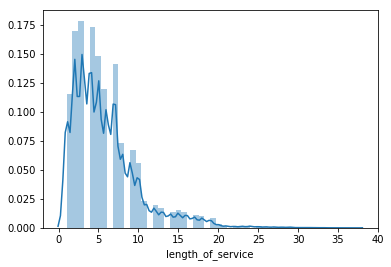

In [86]:
sns.distplot(train_df.length_of_service)

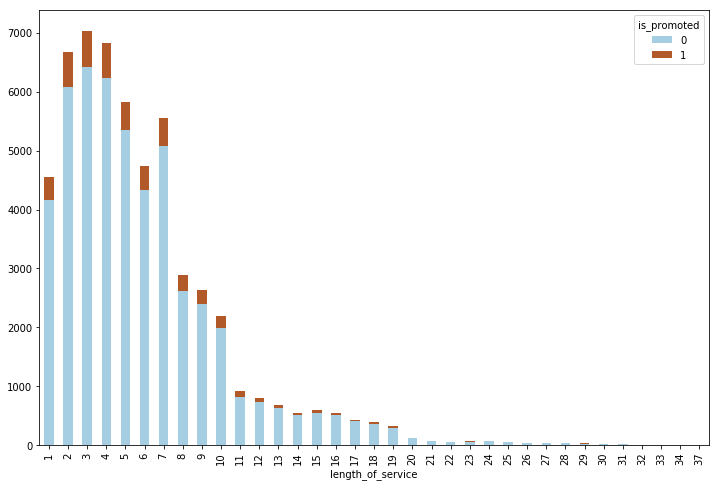

In [87]:
crosstab = pd.crosstab(index=train_df.length_of_service, columns=train_df.is_promoted)
crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

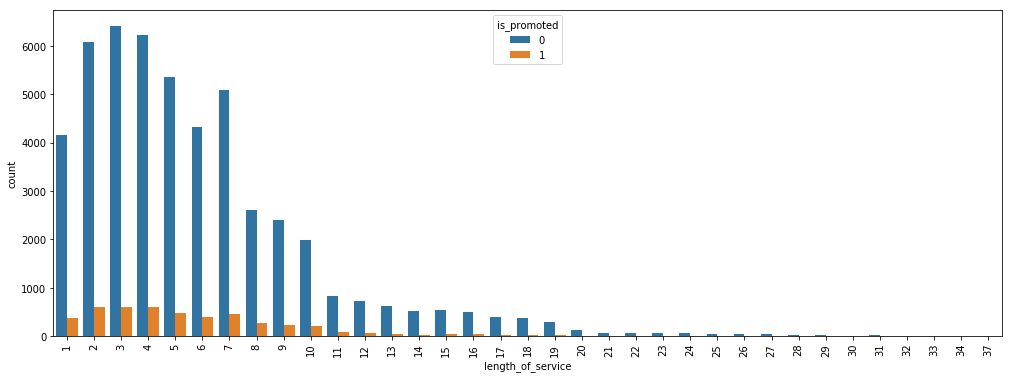

In [88]:
plt.figure(figsize=(17,6))
sns.countplot(train_df.length_of_service,hue=train_df.is_promoted)
plt.xticks(rotation=90)


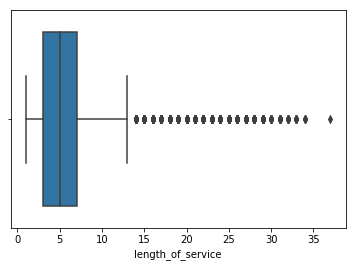

In [89]:
sns.boxplot(train_df.length_of_service)

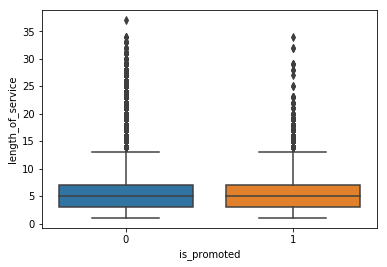

In [90]:
sns.boxplot(x=train_df.is_promoted,y=train_df.length_of_service)

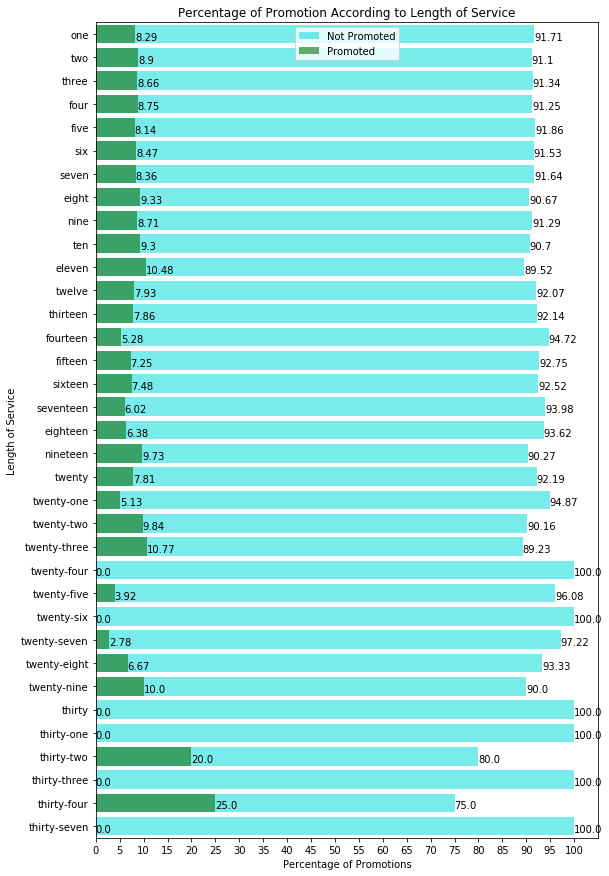

In [91]:
# "Percentage of Promotion According to Length of Service "
req_list = sorted(list(train_df['length_of_service'].unique()))
req_list = [x for x in req_list if str(x) != 'nan']

not_promoted = []
promoted=[]
for i in req_list:
    x = train_df[train_df['length_of_service']==i]
    not_promoted.append((sum(x.is_promoted == 0)/len(x))*100)
    promoted.append((sum(x.is_promoted == 1)/len(x))*100)

# visualization
f,ax = plt.subplots(figsize = (9,15))
p = inflect.engine()
 
req_list = [p.number_to_words(number) for number in req_list]
b1 = sns.barplot(x=not_promoted,y=req_list,color='cyan',alpha = 0.6,label='Not Promoted') 
b2 = sns.barplot(x=promoted,y=req_list,color='green',alpha = 0.6,label='Promoted')

# For displaying the percentage values
for p in b1.patches:
    ax.annotate(str(float("{0:.2f}".format(p.get_width()))), (p.get_x() + p.get_width(), p.get_y()), xytext=(0, -15), textcoords='offset points',color='black')

ax.legend(loc='upper center',frameon = True)     # legend
ax.set(xlabel='Percentage of Promotions', ylabel='Length of Service',title = "Percentage of Promotion According to Length of Service")

plt.xticks(np.arange(0,105,5))
#plt.grid(color='gray', linestyle='-', linewidth=0.5,axis='x')
plt.show()

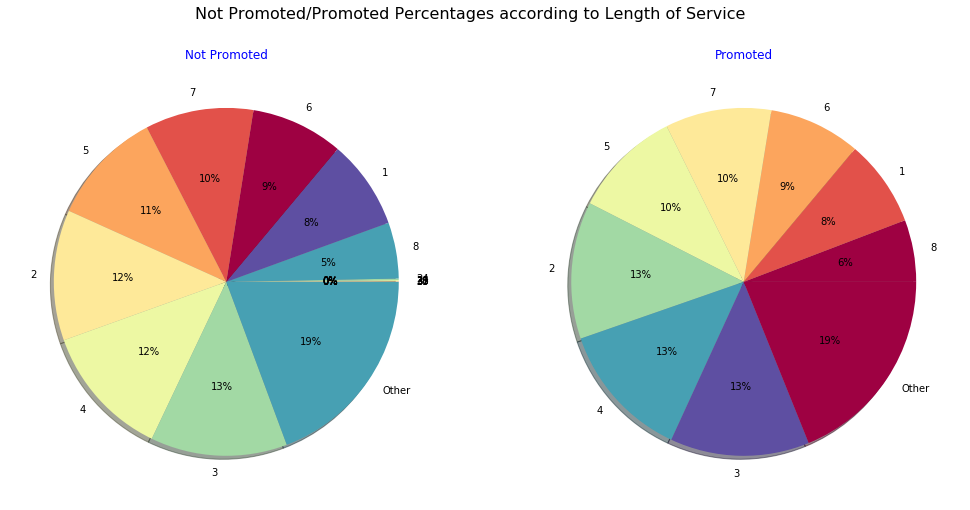

In [92]:
## Grouping the low percentages

def group_lower_ranking_values(df,column):
    pie_counts = df1.groupby(column).agg('count')
    pct_value = pie_counts[lambda df: df.columns[0]].quantile(.75)
    values_below_pct_value = pie_counts[lambda df: df.columns[0]].loc[lambda s: s < pct_value].index.values
    def fix_values(row):
        if row[column] in values_below_pct_value:
            row[column] = 'Other'
        return row 
    pie_grouped = df.apply(fix_values, axis=1).groupby(column).agg('count')
    return pie_grouped


df = train_df[train_df['is_promoted']==0]
df1 = train_df[train_df['is_promoted']==1]
not_promoted = group_lower_ranking_values(df,'length_of_service')
promoted = group_lower_ranking_values(df1,'length_of_service')

not_promoted_labels = not_promoted['is_promoted'].sort_values().index
not_promoted_counts = not_promoted['is_promoted'].sort_values()

promoted_labels = promoted['is_promoted'].sort_values().index
promoted_counts = promoted['is_promoted'].sort_values()

# Visualization
plt.figure(1, figsize=(17,8))

cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

plt.subplot(1,2,1)
not_promoted_pie = plt.pie(not_promoted_counts, labels=not_promoted_labels, autopct='%.0f%%', shadow=True, colors=colors)
plt.title('Not Promoted',color = 'blue',fontsize = 12)

plt.subplot(1,2,2)
promoted_pie = plt.pie(promoted_counts,labels=promoted_labels, autopct='%.0f%%', shadow=True, colors=colors)
plt.title('Promoted',color = 'blue',fontsize = 12)

plt.suptitle('Not Promoted/Promoted Percentages according to Length of Service', fontsize=16)
plt.show()

#### Note:
1. Half of the employees have served the company for at most 5 yrs. Very few stay beyond 13yrs.
2. The number of employees promoted doesn't seem to be related with the length of service.

## Age

C:\Users\SHERILYN\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


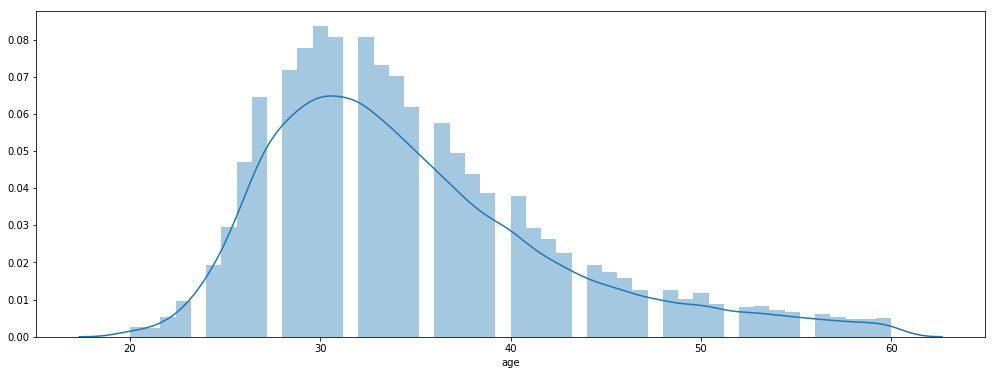

In [93]:
plt.figure(figsize=(17,6))
sns.distplot(train_df.age)

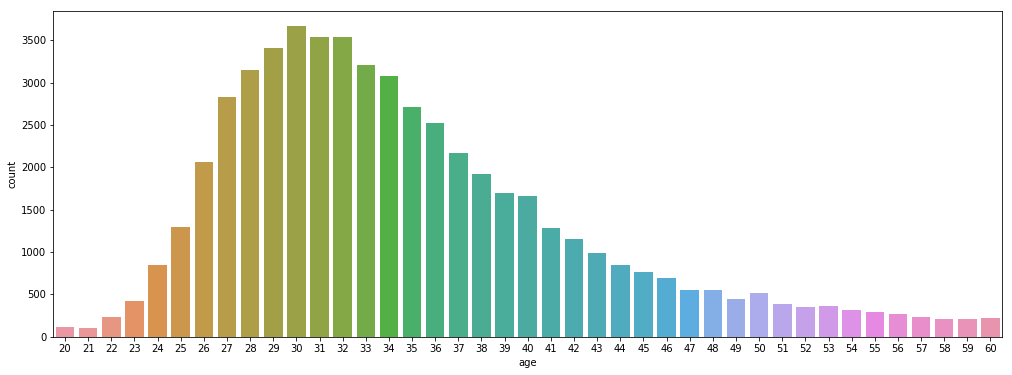

In [94]:
plt.figure(figsize=(17,6))
sns.countplot(train_df.age)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]), <a list of 41 Text xticklabel objects>)

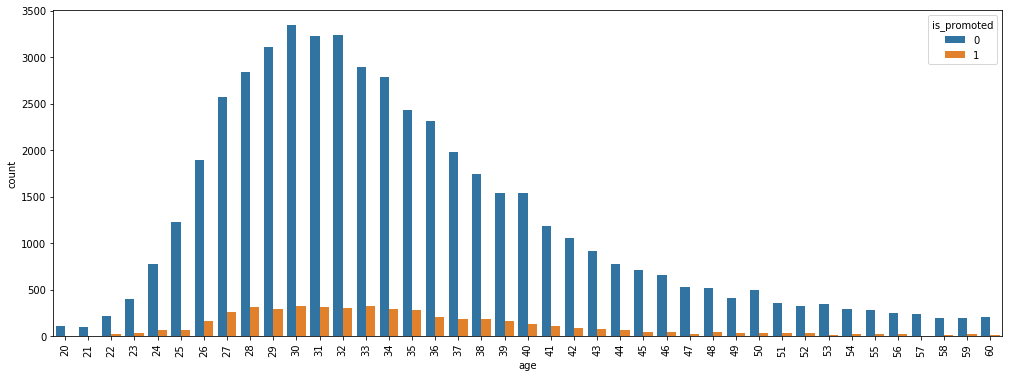

In [95]:
plt.figure(figsize=(17,6))
sns.countplot(train_df.age,hue=train_df.is_promoted)
plt.xticks(rotation=90)

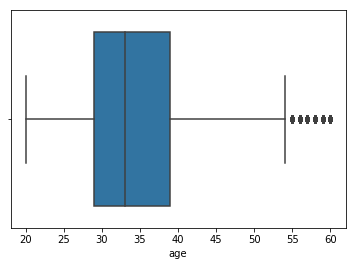

In [96]:
sns.boxplot(x = train_df.age)

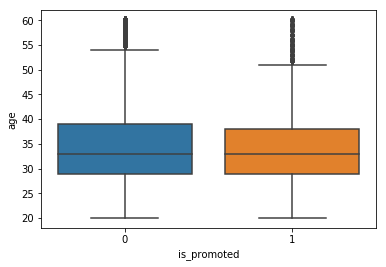

In [97]:
sns.boxplot(y = train_df.age,x = train_df.is_promoted)

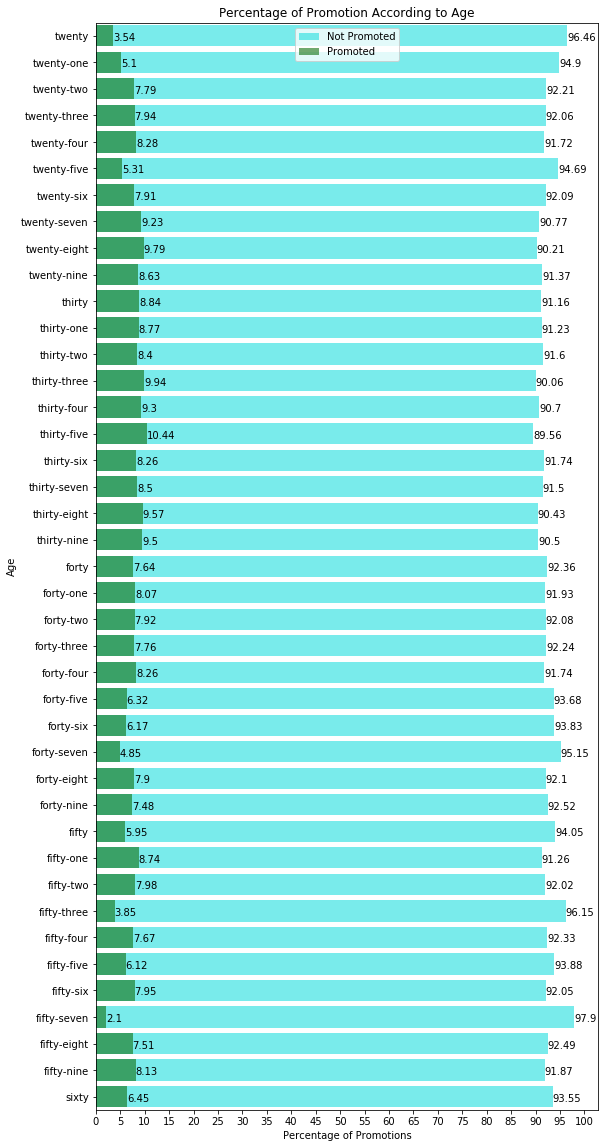

In [98]:
# "Percentage of Promotion According to Age "
req_list = sorted(list(train_df['age'].unique()))
req_list = [x for x in req_list if str(x) != 'nan']

not_promoted = []
promoted=[]
for i in req_list:
    x = train_df[train_df['age']==i]
    not_promoted.append((sum(x.is_promoted == 0)/len(x))*100)
    promoted.append((sum(x.is_promoted == 1)/len(x))*100)

# visualization
f,ax = plt.subplots(figsize = (9,20))
p = inflect.engine()
 
req_list = [p.number_to_words(number) for number in req_list]
b1 = sns.barplot(x=not_promoted,y=req_list,color='cyan',alpha = 0.6,label='Not Promoted') 
b2 = sns.barplot(x=promoted,y=req_list,color='green',alpha = 0.6,label='Promoted')

# For displaying the percentage values
for p in b1.patches:
    ax.annotate(str(float("{0:.2f}".format(p.get_width()))), (p.get_x() + p.get_width(), p.get_y()), xytext=(0, -15), textcoords='offset points',color='black')

ax.legend(loc='upper center',frameon = True)     # legend
ax.set(xlabel='Percentage of Promotions', ylabel='Age',title = "Percentage of Promotion According to Age")

plt.xticks(np.arange(0,105,5))
#plt.grid(color='gray', linestyle='-', linewidth=0.5,axis='x')
plt.show()

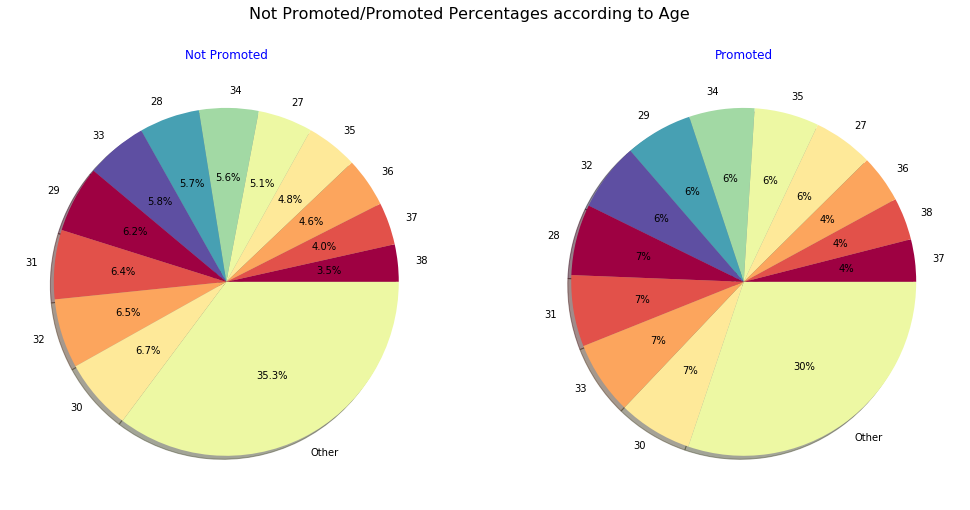

In [99]:
## Grouping the low percentages

def group_lower_ranking_values(df,column):
    pie_counts = df1.groupby(column).agg('count')
    pct_value = pie_counts[lambda df: df.columns[0]].quantile(.75)
    values_below_pct_value = pie_counts[lambda df: df.columns[0]].loc[lambda s: s < pct_value].index.values
    def fix_values(row):
        if row[column] in values_below_pct_value:
            row[column] = 'Other'
        return row 
    pie_grouped = df.apply(fix_values, axis=1).groupby(column).agg('count')
    return pie_grouped


df = train_df[train_df['is_promoted']==0]
df1 = train_df[train_df['is_promoted']==1]
not_promoted = group_lower_ranking_values(df,'age')
promoted = group_lower_ranking_values(df1,'age')

not_promoted_labels = not_promoted['is_promoted'].sort_values().index
not_promoted_counts = not_promoted['is_promoted'].sort_values()

promoted_labels = promoted['is_promoted'].sort_values().index
promoted_counts = promoted['is_promoted'].sort_values()

# Visualization
plt.figure(1, figsize=(17,8))

cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

plt.subplot(1,2,1)
not_promoted_pie = plt.pie(not_promoted_counts, labels=not_promoted_labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.title('Not Promoted',color = 'blue',fontsize = 12)

plt.subplot(1,2,2)
promoted_pie = plt.pie(promoted_counts,labels=promoted_labels, autopct='%.0f%%', shadow=True, colors=colors)
plt.title('Promoted',color = 'blue',fontsize = 12)

plt.suptitle('Not Promoted/Promoted Percentages according to Age', fontsize=16)
plt.show()

#### Note:
1. The youngest employee is 20yrs while the oldest is 60yrs.
2. Half of the employees are below 33yrs while very few employees are above 55yrs.
3. The percentage of promotions across all ages is more or less the same.

## KPIs_met >80%

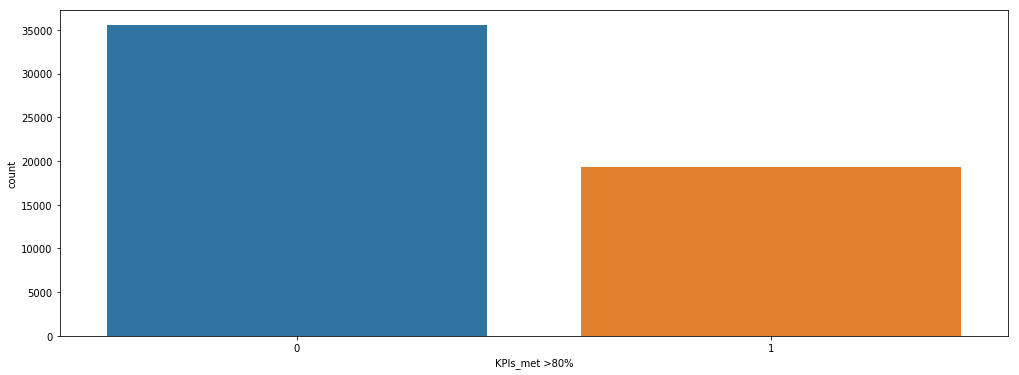

In [100]:
plt.figure(figsize=(17,6))
sns.countplot(train_df['KPIs_met >80%'])

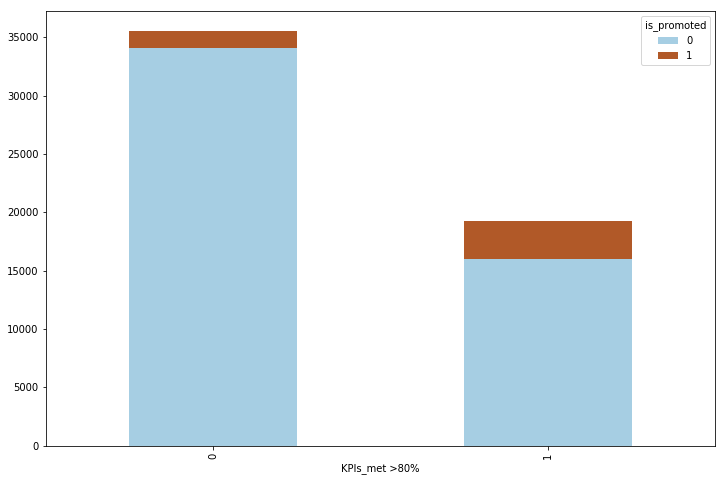

In [101]:
crosstab = pd.crosstab(index=train_df['KPIs_met >80%'], columns=train_df.is_promoted)
crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')

(array([0, 1]), <a list of 2 Text xticklabel objects>)

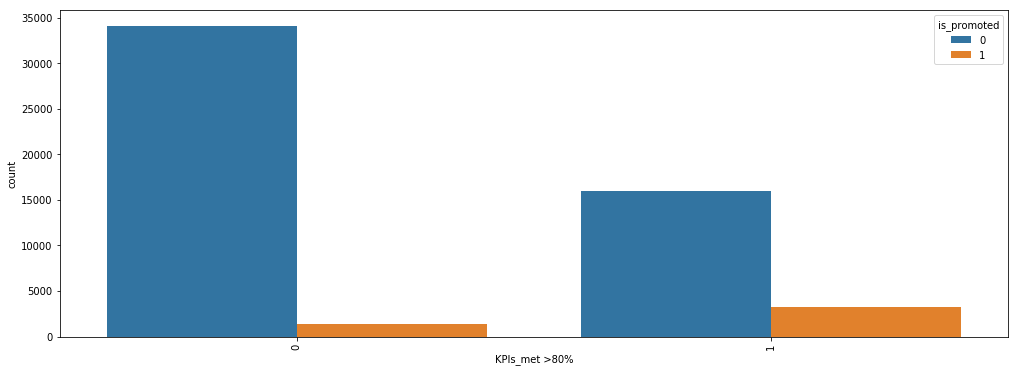

In [102]:
plt.figure(figsize=(17,6))
sns.countplot(train_df['KPIs_met >80%'],hue=train_df.is_promoted)
plt.xticks(rotation=90)

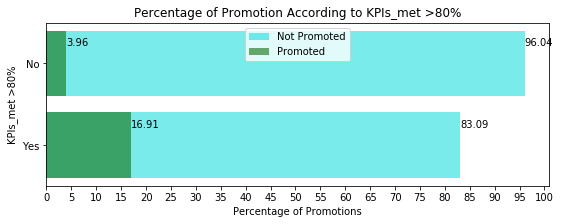

In [103]:
# "Percentage of Promotion According to KPIs_met >80% "
train_df1['KPIs_met >80%'] = train_df1['KPIs_met >80%'].astype(object)
req_list = sorted(list(train_df1['KPIs_met >80%'].unique()))
req_list = [x for x in req_list if str(x) != 'nan']

not_promoted = []
promoted=[]
for i in req_list:
    x = train_df[train_df1['KPIs_met >80%']==i]
    not_promoted.append((sum(x.is_promoted == 0)/len(x))*100)
    promoted.append((sum(x.is_promoted == 1)/len(x))*100)

# visualization
f,ax = plt.subplots(figsize = (9,3))
req_list = ['No','Yes']
b1 = sns.barplot(x=not_promoted,y=req_list,color='cyan',alpha = 0.6,label='Not Promoted') 
b2 = sns.barplot(x=promoted,y=req_list,color='green',alpha = 0.6,label='Promoted')

# For displaying the percentage values
for p in b1.patches:
    ax.annotate(str(float("{0:.2f}".format(p.get_width()))), (p.get_x() + p.get_width(), p.get_y()), xytext=(0, -15), textcoords='offset points',color='black')

ax.legend(loc='upper center',frameon = True)     # legend
ax.set(xlabel='Percentage of Promotions', ylabel='KPIs_met >80%',title = "Percentage of Promotion According to KPIs_met >80%")

plt.xticks(np.arange(0,105,5))
plt.show()

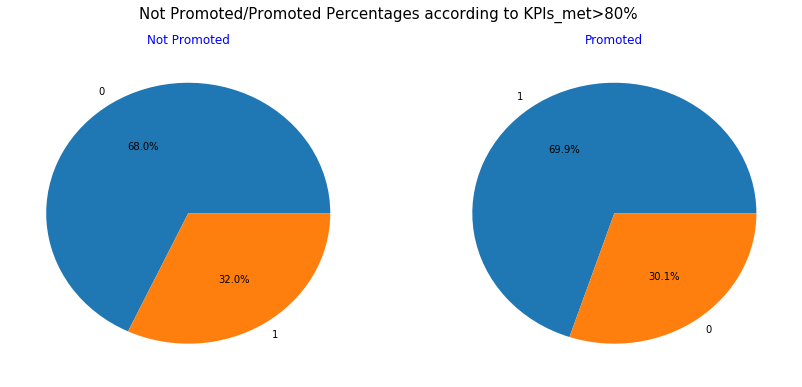

In [104]:
# Not Promoted/Promoted Percentages according to KPI_met>80%
#train_df[train_df['is_promoted']==0]['department'].dropna(inplace = True)
df = train_df[train_df['is_promoted']==0]['KPIs_met >80%']
not_prom_nos = df.value_counts().nunique()
not_prom_labels = df.value_counts().index
not_prom_explode = list(np.zeros(not_prom_nos).astype(int))
not_prom_per = df.value_counts().values

df1 = train_df[train_df['is_promoted']==1]['KPIs_met >80%']
prom_nos = df1.value_counts().nunique()
prom_labels = df1.value_counts().index
prom_explode = list(np.zeros(prom_nos).astype(int))
prom_per = df1.value_counts().values

# visual
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
plt.pie(not_prom_per,labels=not_prom_labels,explode=not_prom_explode, autopct='%1.1f%%')
#plt.legend(loc='center')
plt.title('Not Promoted',color = 'blue',fontsize = 12)

plt.subplot(1,2,2)
plt.pie(prom_per,labels=prom_labels, autopct='%1.1f%%')
plt.title('Promoted',color = 'blue',fontsize = 12)

plt.suptitle('Not Promoted/Promoted Percentages according to KPIs_met>80%',fontsize = 15)
plt.show()

#### Note
1. Clearly evident from the plots that employees which met KPI's greater than 80% received a greater percentage of the promotions offered. 2/3rd of the promotions were offered to successful employees.

## awards_won? 

(array([0, 1]), <a list of 2 Text xticklabel objects>)

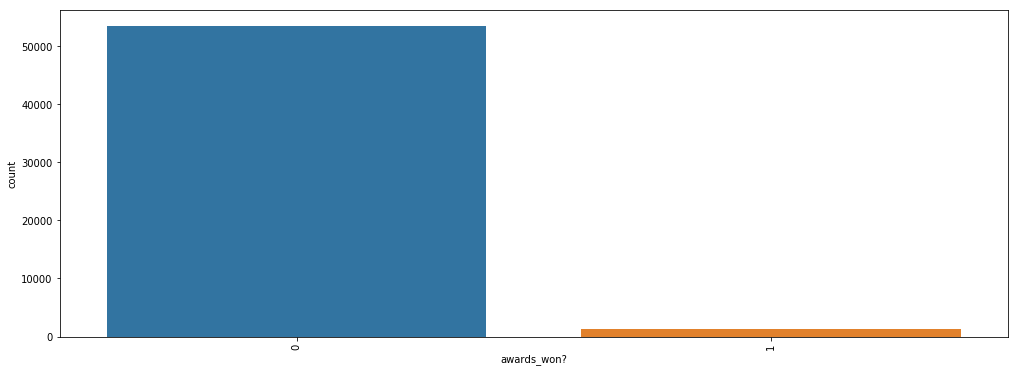

In [105]:
plt.figure(figsize=(17,6))
sns.countplot(train_df['awards_won?'])
plt.xticks(rotation=90)

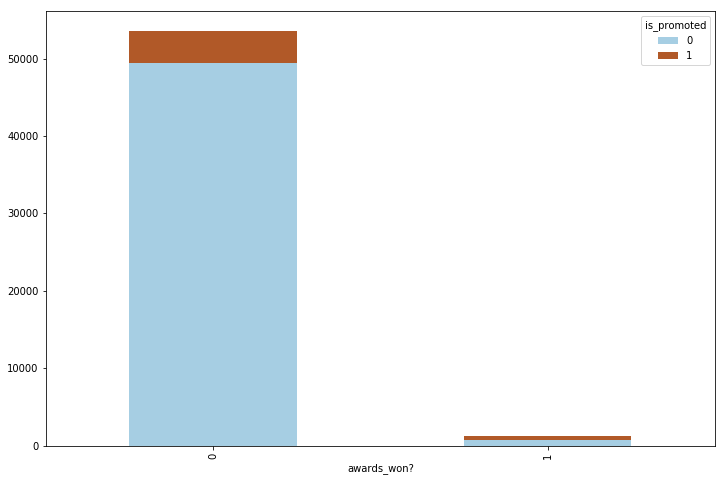

In [106]:
crosstab = pd.crosstab(index=train_df['awards_won?'], columns=train_df.is_promoted)
crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')

(array([0, 1]), <a list of 2 Text xticklabel objects>)

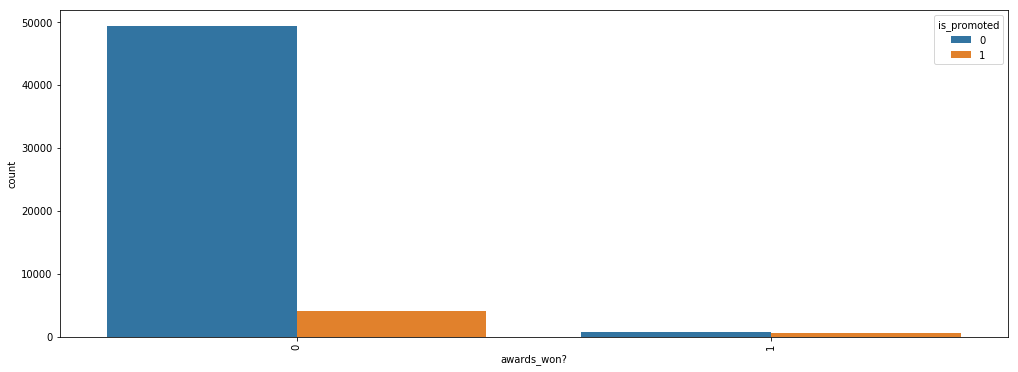

In [107]:
plt.figure(figsize=(17,6))
sns.countplot(train_df['awards_won?'], hue=train_df.is_promoted)
plt.xticks(rotation=90)

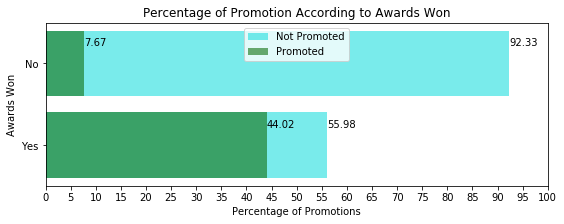

In [108]:
# "Percentage of Promotion According to awards_won? "
train_df1['awards_won?'] = train_df1['awards_won?'].astype(object)
req_list = sorted(list(train_df1['awards_won?'].unique()))
req_list = [x for x in req_list if str(x) != 'nan']

not_promoted = []
promoted=[]
for i in req_list:
    x = train_df[train_df1['awards_won?']==i]
    not_promoted.append((sum(x.is_promoted == 0)/len(x))*100)
    promoted.append((sum(x.is_promoted == 1)/len(x))*100)

# visualization
f,ax = plt.subplots(figsize = (9,3))
req_list = ['No','Yes']
b1 = sns.barplot(x=not_promoted,y=req_list,color='cyan',alpha = 0.6,label='Not Promoted') 
b2 = sns.barplot(x=promoted,y=req_list,color='green',alpha = 0.6,label='Promoted')

# For displaying the percentage values
for p in b1.patches:
    ax.annotate(str(float("{0:.2f}".format(p.get_width()))), (p.get_x() + p.get_width(), p.get_y()), xytext=(0, -15), textcoords='offset points',color='black')

ax.legend(loc='upper center',frameon = True)     # legend
ax.set(xlabel='Percentage of Promotions', ylabel='Awards Won',title = "Percentage of Promotion According to Awards Won")

plt.xticks(np.arange(0,105,5))
plt.show()

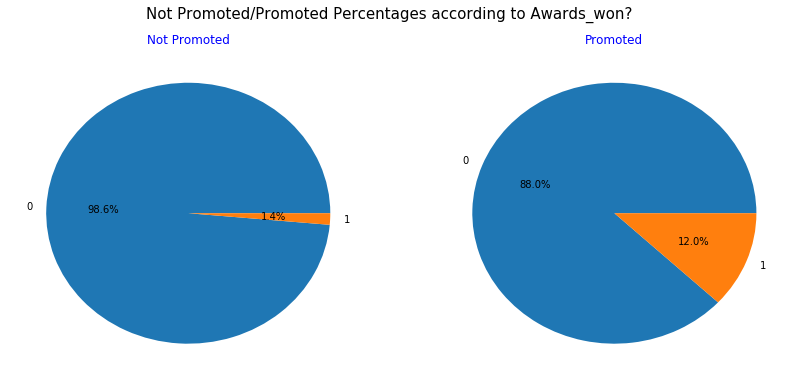

In [109]:
# Not Promoted/Promoted Percentages according to Awards_won?
#train_df[train_df['is_promoted']==0]['department'].dropna(inplace = True)
df = train_df[train_df['is_promoted']==0]['awards_won?']
not_prom_nos = df.value_counts().nunique()
not_prom_labels = df.value_counts().index
not_prom_explode = list(np.zeros(not_prom_nos).astype(int))
not_prom_per = df.value_counts().values

df1 = train_df[train_df['is_promoted']==1]['awards_won?']
prom_nos = df1.value_counts().nunique()
prom_labels = df1.value_counts().index

prom_explode = list(np.zeros(prom_nos).astype(int))
prom_per = df1.value_counts().values

# visual
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
plt.pie(not_prom_per,labels=not_prom_labels,explode=not_prom_explode, autopct='%1.1f%%')
#plt.legend(loc='center')
plt.title('Not Promoted',color = 'blue',fontsize = 12)

plt.subplot(1,2,2)
plt.pie(prom_per,labels=prom_labels, autopct='%1.1f%%')
plt.title('Promoted',color = 'blue',fontsize = 12)

plt.suptitle('Not Promoted/Promoted Percentages according to Awards_won?',fontsize = 15)
plt.show()

#### Note:
1. The employees who won awards received most of the promotions around 88%.

## avg_training_score

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60]),
 <a list of 61 Text xticklabel objects>)

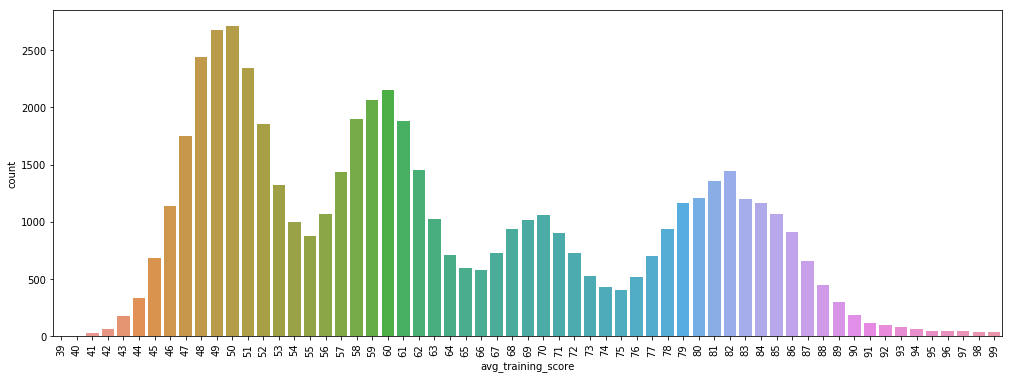

In [110]:
plt.figure(figsize=(17,6))
sns.countplot(train_df.avg_training_score)
plt.xticks(rotation=90)

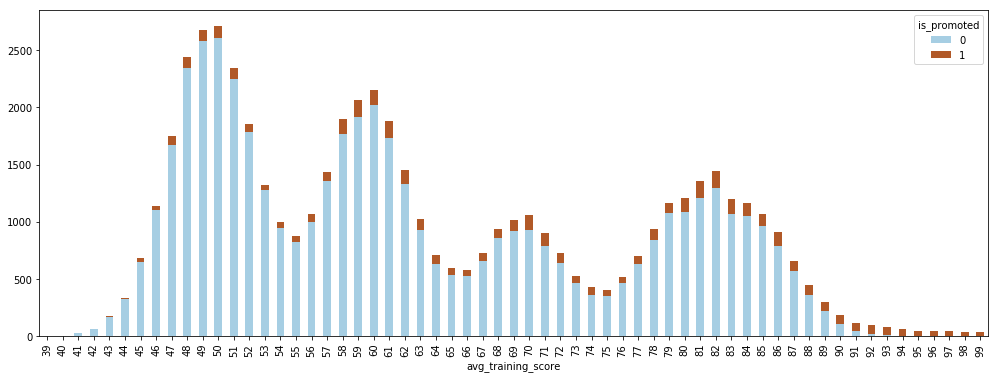

In [111]:
crosstab = pd.crosstab(index=train_df['avg_training_score'], columns=train_df.is_promoted)
crosstab.plot(kind="bar", figsize=(17,6), stacked=True, colormap='Paired')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60]),
 <a list of 61 Text xticklabel objects>)

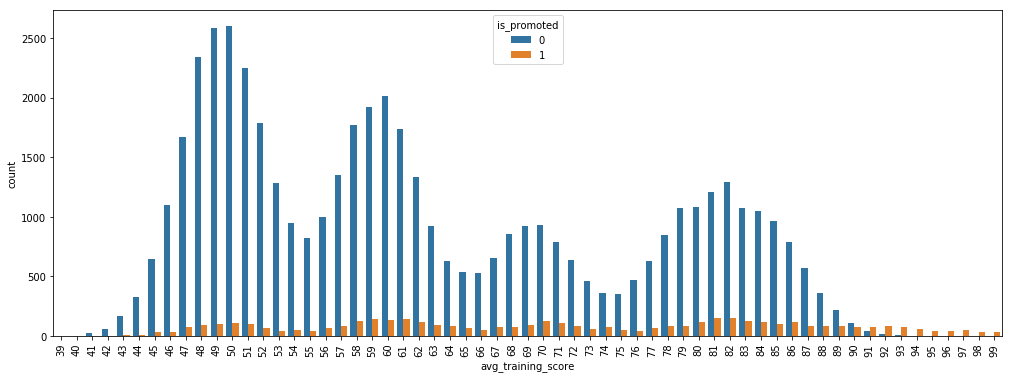

In [112]:
plt.figure(figsize=(17,6))
sns.countplot(train_df.avg_training_score, hue=train_df.is_promoted)
plt.xticks(rotation=90)

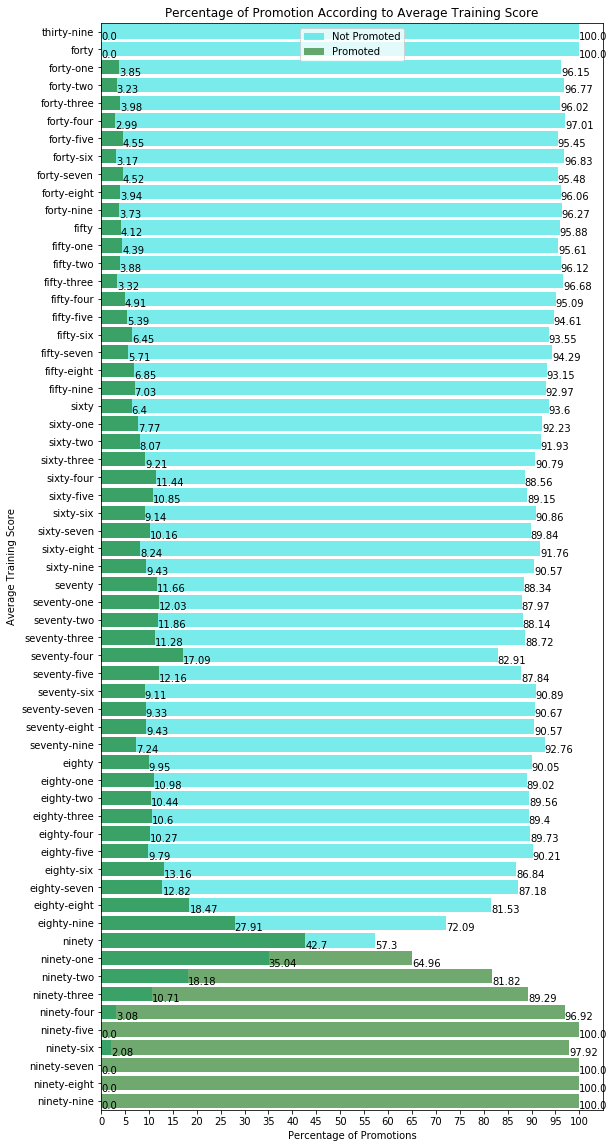

In [113]:
# "Percentage of Promotion According to Average Training Score"
req_list = sorted(list(train_df['avg_training_score'].unique()))
req_list = [x for x in req_list if str(x) != 'nan']

not_promoted = []
promoted=[]
for i in req_list:
    x = train_df[train_df['avg_training_score']==i]
    not_promoted.append((sum(x.is_promoted == 0)/len(x))*100)
    promoted.append((sum(x.is_promoted == 1)/len(x))*100)

# visualization
f,ax = plt.subplots(figsize = (9,20))
p = inflect.engine()
 
req_list = [p.number_to_words(number) for number in req_list]
b1 = sns.barplot(x=not_promoted,y=req_list,color='cyan',alpha = 0.6,label='Not Promoted') 
b2 = sns.barplot(x=promoted,y=req_list,color='green',alpha = 0.6,label='Promoted')

# For displaying the percentage values
for p in b1.patches:
    ax.annotate(str(float("{0:.2f}".format(p.get_width()))), (p.get_x() + p.get_width(), p.get_y()), xytext=(0, -15), textcoords='offset points',color='black')

ax.legend(loc='upper center',frameon = True)     # legend
ax.set(xlabel='Percentage of Promotions', ylabel='Average Training Score',title = "Percentage of Promotion According to Average Training Score")

plt.xticks(np.arange(0,105,5))
#plt.grid(color='gray', linestyle='-', linewidth=0.5,axis='x')
plt.show()

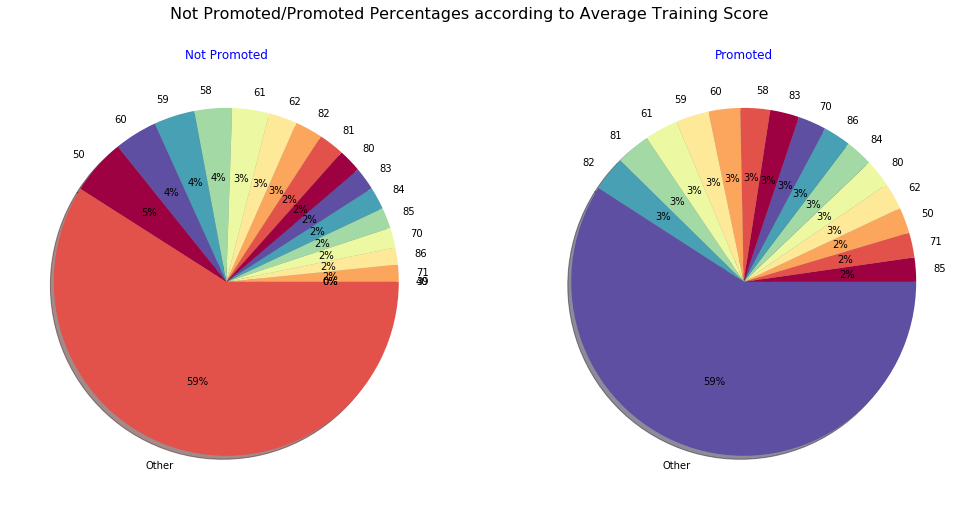

In [114]:
## Grouping the low percentages

def group_lower_ranking_values(df,column):
    pie_counts = df1.groupby(column).agg('count')
    pct_value = pie_counts[lambda df: df.columns[0]].quantile(.75)
    values_below_pct_value = pie_counts[lambda df: df.columns[0]].loc[lambda s: s < pct_value].index.values
    def fix_values(row):
        if row[column] in values_below_pct_value:
            row[column] = 'Other'
        return row 
    pie_grouped = df.apply(fix_values, axis=1).groupby(column).agg('count')
    return pie_grouped


df = train_df[train_df['is_promoted']==0]
df1 = train_df[train_df['is_promoted']==1]
not_promoted = group_lower_ranking_values(df,'avg_training_score')
promoted = group_lower_ranking_values(df1,'avg_training_score')

not_promoted_labels = not_promoted['is_promoted'].sort_values().index
not_promoted_counts = not_promoted['is_promoted'].sort_values()

promoted_labels = promoted['is_promoted'].sort_values().index
promoted_counts = promoted['is_promoted'].sort_values()

# Visualization
plt.figure(1, figsize=(17,8))

cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

plt.subplot(1,2,1)
not_promoted_pie = plt.pie(not_promoted_counts, labels=not_promoted_labels, autopct='%.0f%%', shadow=True, colors=colors)
plt.title('Not Promoted',color = 'blue',fontsize = 12)

plt.subplot(1,2,2)
promoted_pie = plt.pie(promoted_counts,labels=promoted_labels, autopct='%.0f%%', shadow=True, colors=colors)
plt.title('Promoted',color = 'blue',fontsize = 12)

plt.suptitle('Not Promoted/Promoted Percentages according to Average Training Score', fontsize=16)
plt.show()

#### Note:
1. Employees with a higher training score were likely to receive a promotion. 

## Bivariate Analysis

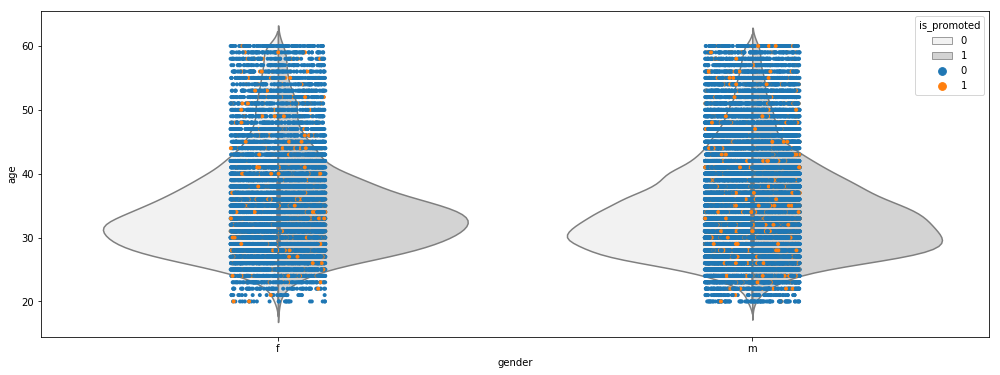

In [115]:
plt.figure(figsize=(17,6))
sns.violinplot(x=train_df.gender,y=train_df.age,hue=train_df.is_promoted,split=True,color='lightgray')
sns.stripplot(x=train_df.gender,y=train_df.age,hue=train_df.is_promoted,jitter=True,size=4)
plt.show()

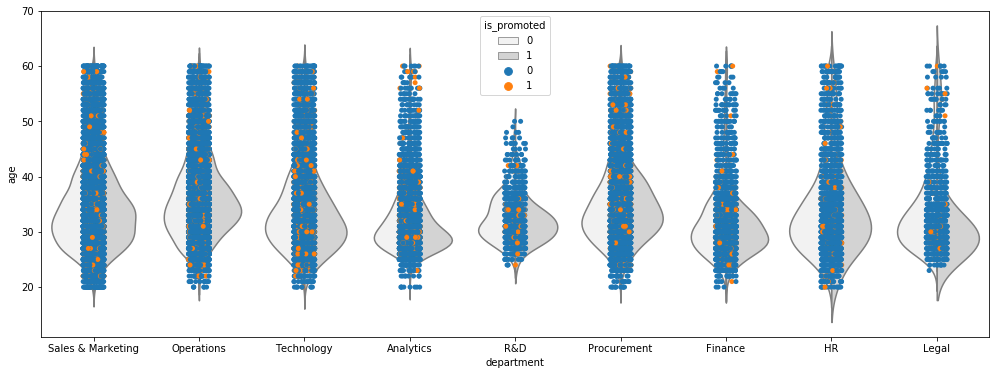

In [116]:
plt.figure(figsize=(17,6))
sns.violinplot(x=train_df.department,y=train_df.age,hue=train_df.is_promoted,split=True,color='lightgray')
sns.stripplot(x=train_df.department,y=train_df.age,hue=train_df.is_promoted,jitter=True)
#plt.xticks(train_df.sex,('Female','Male'))
plt.show()

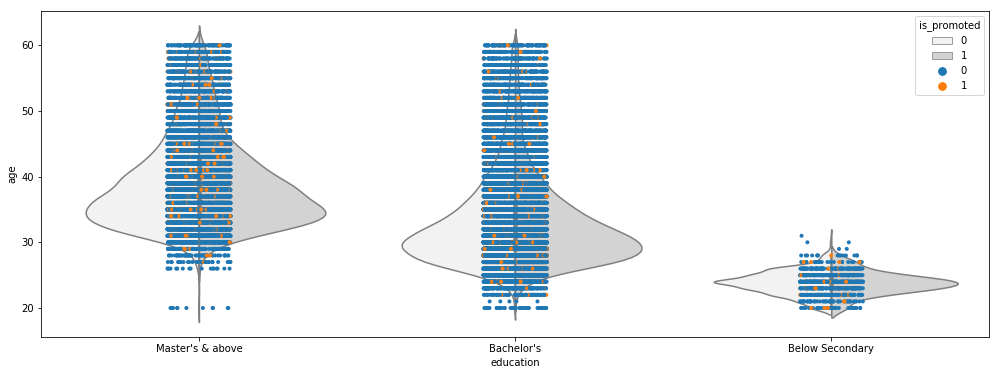

In [117]:
plt.figure(figsize=(17,6))
sns.violinplot(x=train_df.education,y=train_df.age,hue=train_df.is_promoted,split=True,color='lightgray')
sns.stripplot(x=train_df.education,y=train_df.age,hue=train_df.is_promoted,jitter=True,size=4)
plt.show()

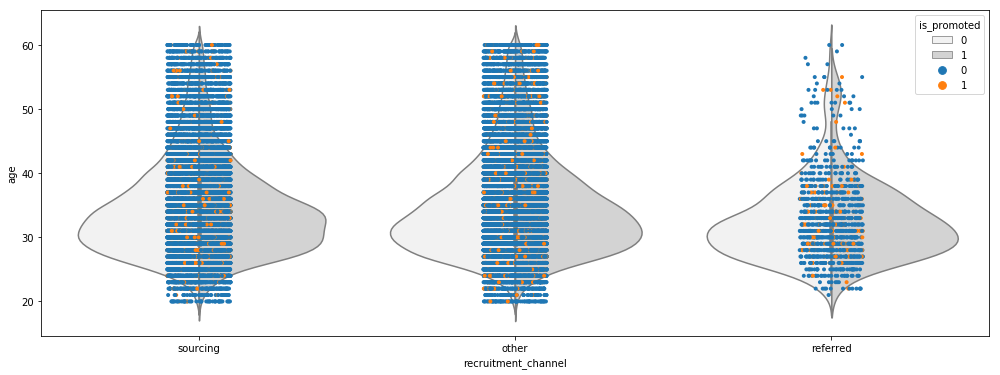

In [118]:
plt.figure(figsize=(17,6))
sns.violinplot(x=train_df.recruitment_channel,y=train_df.age,hue=train_df.is_promoted,split=True,color='lightgray')
sns.stripplot(x=train_df.recruitment_channel,y=train_df.age,hue=train_df.is_promoted,jitter=True,size=4)
plt.show()

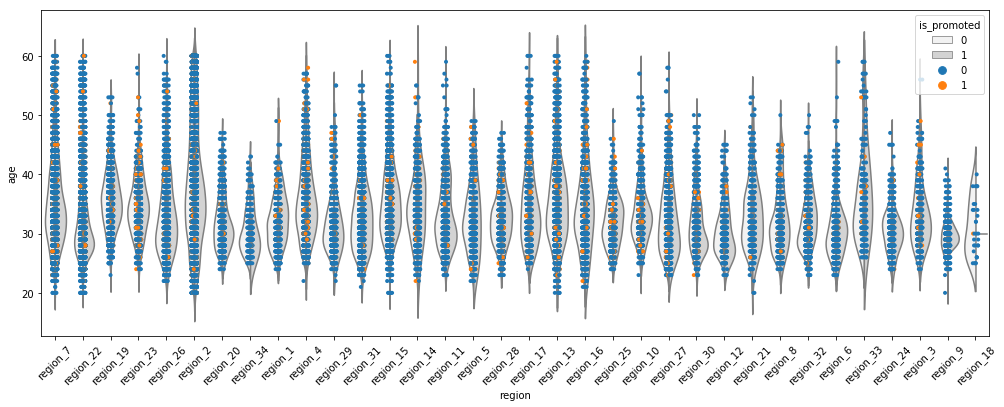

In [119]:
plt.figure(figsize=(17,6))
sns.violinplot(x=train_df.region,y=train_df.age,hue=train_df.is_promoted,split=True,color='lightgray')
sns.stripplot(x=train_df.region,y=train_df.age,hue=train_df.is_promoted,jitter=True,size=4)
plt.xticks(rotation=45)
plt.show()

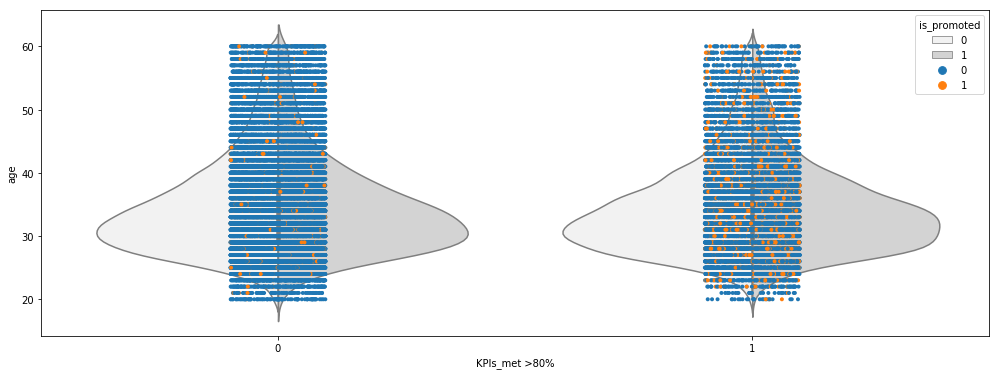

In [120]:
plt.figure(figsize=(17,6))
sns.violinplot(x=train_df['KPIs_met >80%'],y=train_df.age,hue=train_df.is_promoted,split=True,color='lightgray')
sns.stripplot(x=train_df['KPIs_met >80%'],y=train_df.age,hue=train_df.is_promoted,jitter=True,size=4)
plt.show()

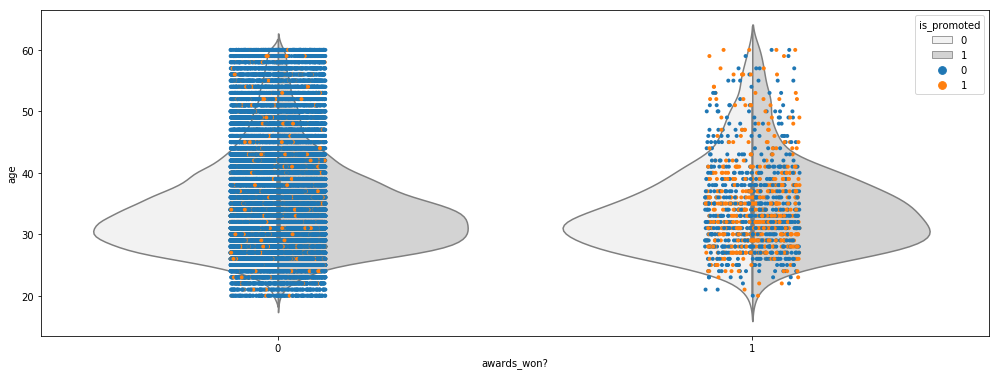

In [121]:
plt.figure(figsize=(17,6))
sns.violinplot(x=train_df['awards_won?'],y=train_df.age,hue=train_df.is_promoted,split=True,color='lightgray')
sns.stripplot(x=train_df['awards_won?'],y=train_df.age,hue=train_df.is_promoted,jitter=True,size=4)
plt.show()

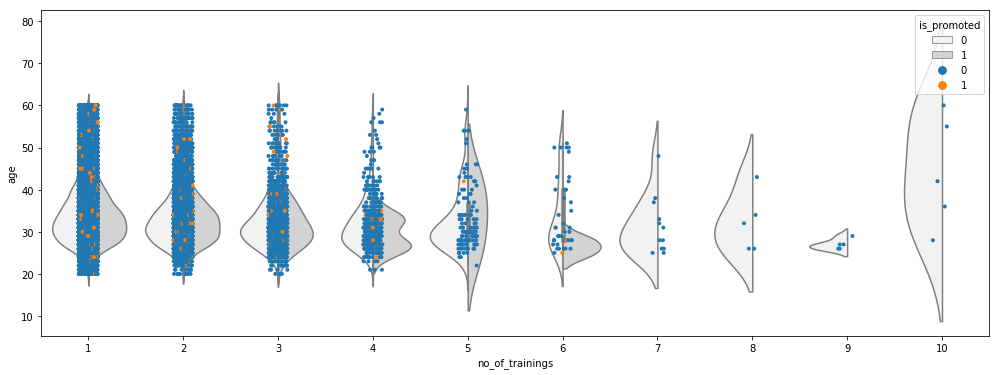

In [122]:
plt.figure(figsize=(17,6))
sns.violinplot(x=train_df.no_of_trainings,y=train_df.age,hue=train_df.is_promoted,split=True,color='lightgray')
sns.stripplot(x=train_df.no_of_trainings,y=train_df.age,hue=train_df.is_promoted,jitter=True,size=4)

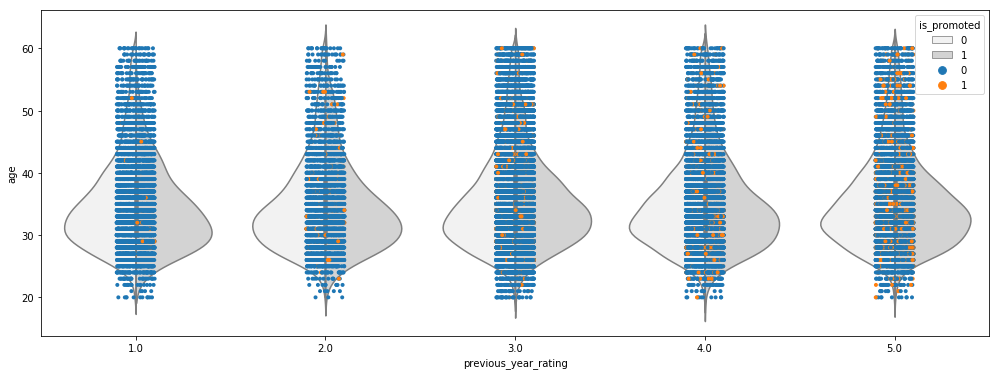

In [123]:
plt.figure(figsize=(17,6))
sns.violinplot(x=train_df.previous_year_rating,y=train_df.age,hue=train_df.is_promoted,split=True,color='lightgray')
sns.stripplot(x=train_df.previous_year_rating,y=train_df.age,hue=train_df.is_promoted,jitter=True,size=4)

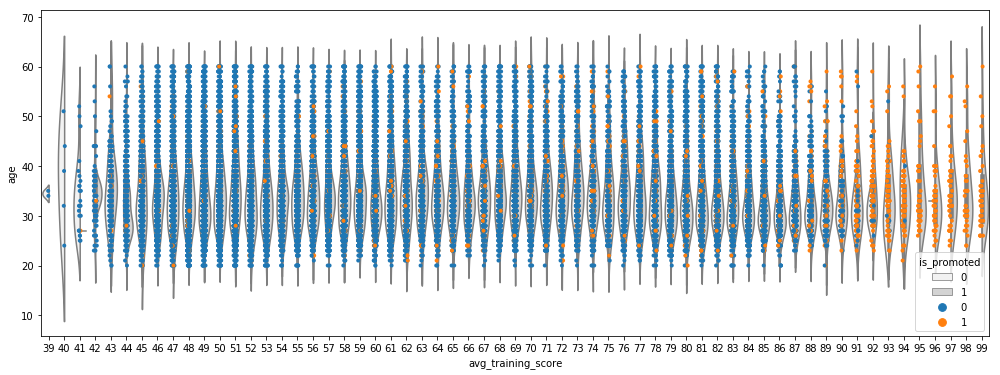

In [124]:
plt.figure(figsize=(17,6))
sns.violinplot(x=train_df.avg_training_score,y=train_df.age,hue=train_df.is_promoted,split=True,color='lightgray')
sns.stripplot(x=train_df.avg_training_score,y=train_df.age,hue=train_df.is_promoted,jitter=True,size=4)

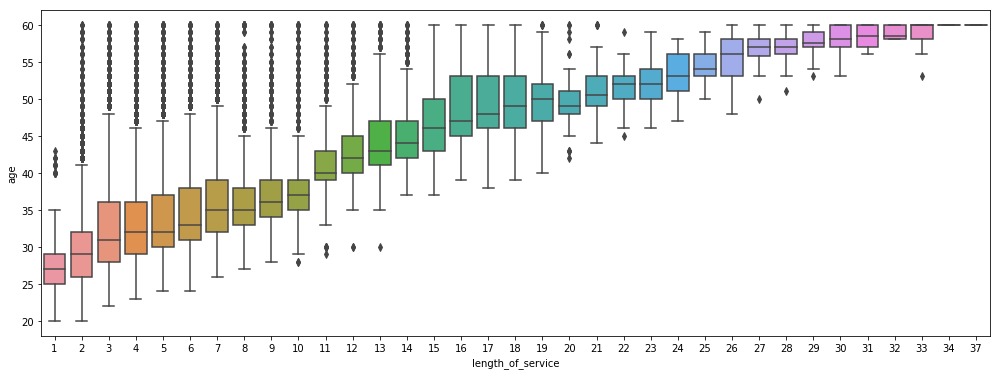

In [125]:
plt.figure(figsize=(17,6))
sns.boxplot(x=train_df.length_of_service,y=train_df.age)
plt.show()

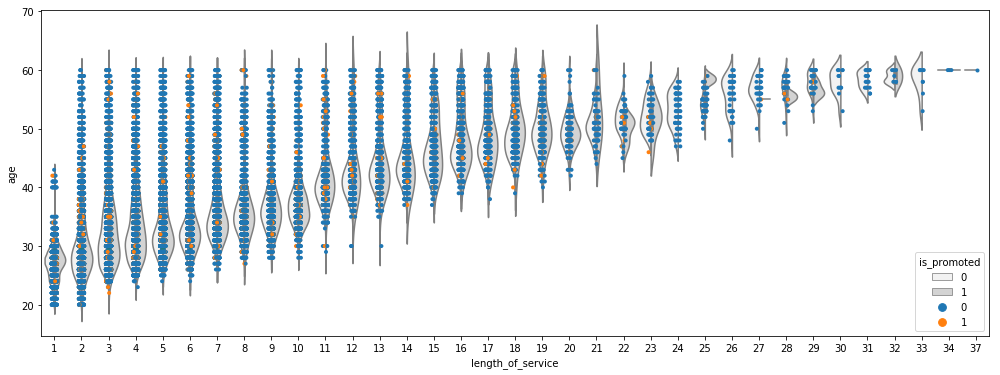

In [126]:
plt.figure(figsize=(17,6))
sns.violinplot(x=train_df.length_of_service,y=train_df.age,hue=train_df.is_promoted,split=True,color='lightgray')
sns.stripplot(x=train_df.length_of_service,y=train_df.age,hue=train_df.is_promoted,jitter=True,size=4)

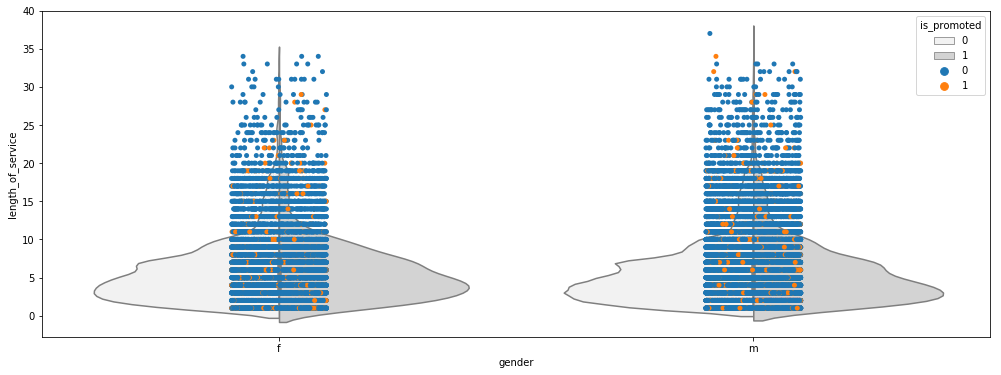

In [127]:
plt.figure(figsize=(17,6))
sns.violinplot(x=train_df.gender,y=train_df.length_of_service,hue=train_df.is_promoted,split=True,color='lightgray')
sns.stripplot(x=train_df.gender,y=train_df.length_of_service,hue=train_df.is_promoted,jitter=True)


## Summary
1. Within a department the percentage of promotions range from 5%-10% with technology, analytics & procurement leading the pack.
2. Within a department the percentage of promotions range from 2%-15% with region4, region17 & region25 leading the pack.
3. The company has maximum employees having a bachelor's degree and the promotions given among employees from different education backgrounds is almost similar around 8-9%.
4. The company has almost 2/3rd male employees and 1/3rd female employees. Promotions are given in the same proportion.The promotions given within a gender almost 8-9%.
5. The company uses sourcing and referred recruitment channels along with some other channels for recruitment.The referred candidates form 2.1% which is the lowest but within the category, 12% received a promotion which is the highest among all the categories.The promotions given within the other categories was 8%.
6. The percentage of promotions given varies inversely with the number of trainings provided and the previous ratings.
7. The percentage of promotions across all ages is more or less the same. Also the number of employees promoted doesn't seem to be related with the length of service.
8. 2/3rd of the promotions were offered to employees who met the criteria of KPI greater than 80%.
9. Employees with a higher training score were likely to receive a promotion. 
10. The employees who won awards received most of the promotions around 88%.

In [128]:
train_df.to_csv('train_modified_dataset_ver1.csv')